In [1]:
sim_year = 5000

In [14]:

hue_order_anonymous = []
pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    print(m)
    if only_global_models:
        if m in ['GLIMB' 'GloGEMflow' 'OGGM_v16' 'PyGEM-OGGM_v13']:
            hue_order.append(m)
            pal_models_l.append(p)

In [11]:
hue_order

[]

In [11]:
#import sys
#sim_year = int(sys.argv[1]) #7 # central europe
sim_years = [sim_year] #[5000]
#sim_years = [5000, 50, 100,300,500] #100, 300, 500, 


fit_to_median=False # False
only_global_models = True


# download it here https://cluster.klima.uni-bremen.de/~lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc
# and change the path to your local path
DATE = 'Jan29_2024' #'apr04' (has OGGM runaway effect of glaciers inside)
fill_option = 'repeat_last_100yrs' #'repeat_last_20yrs'
add_lowess=True
#avg_over = '100yr'
temp_ch = '' #'regional_glacier'
shift_years = True
temp_above_0_8_sel = False
approach = '_via_5yravg'

qs = [0.05,0.25,0.5,0.75,0.95]

N = 10#0#50 #500 #100 #100 #100 #100#100
it = 1#2
rgi_regs_global = ['All','01',
                   '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']
write_exp_text = True


import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from moepy import lowess, eda

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
f_path_data ='/home/users/lschuster/GlacierMIP3/'

f_path ='/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/lowess_fits/'
f_path_f = '/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/figures/2a_lowess_fits/'

try:
    path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)

except:
    path_merged_runs_scaled_extend = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
# --> comes from isimip3b_postprocessing_analysis/isimip3b_postprocess_to_monthly.ipynb
pd_global_temp_exp = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b.csv', index_col = 0)

from help_functions import pal_models, model_order, d_reg_num_name, model_order_anonymous

hue_order_anonymous = []
pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    if only_global_models:
        if m in ['GLIMB', 'GloGEMflow', 'OGGM_v16', 'PyGEM-OGGM_v13']:
            hue_order.append(m)
            pal_models_l.append(p)
    else:
        if (m!='OGGM-VAS') and (m!='OGGM_v153') and (m!='Huss'):
            hue_order.append(m)
            pal_models_l.append(p)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 10.57it/s]


All [0.31]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 11.27it/s]


01 [0.44]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 13.61it/s]


02 [0.39]


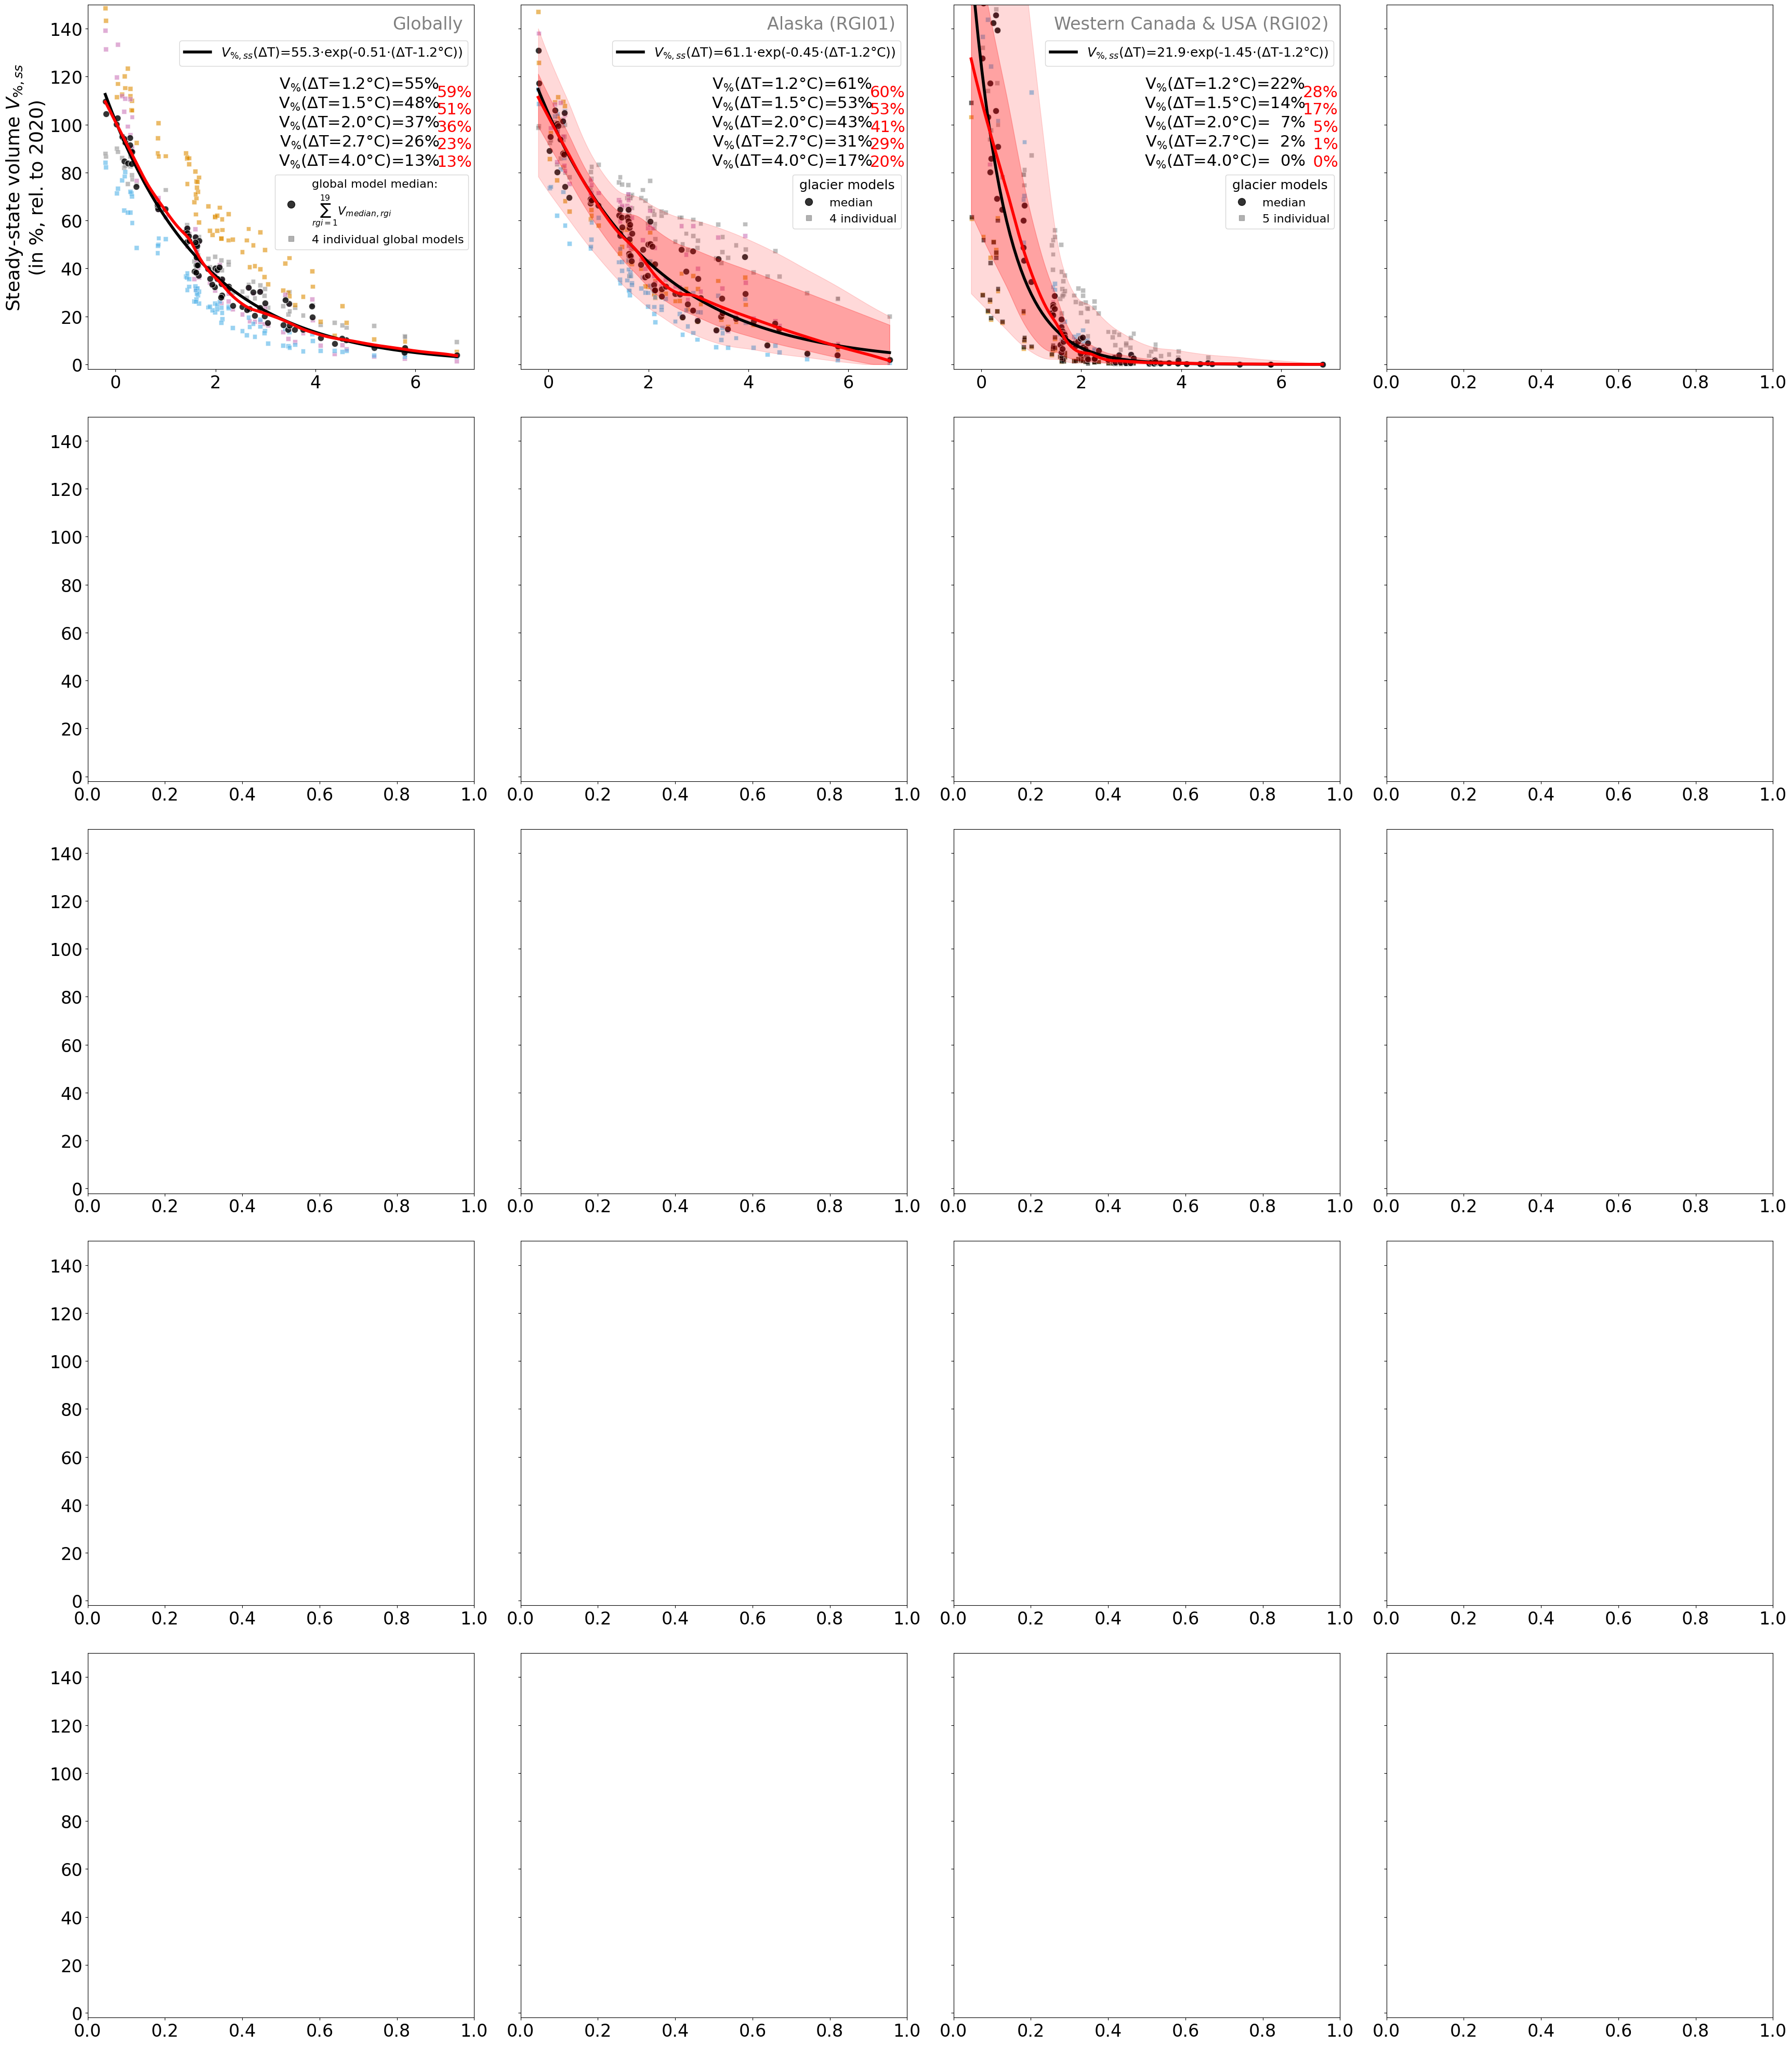

In [13]:

pal_models = pal_models_l
pal_models = sns.color_palette(pal_models)

   
ds_reg_models = ds_reg_models.sel(model_author=hue_order)
ds_reg_models_vol = ds_reg_models.volume_m3 #.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

# Let's take the median estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])
ds_reg_models_med_vol = ds_reg_models_vol.median(dim='model_author')
num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)', 5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)', 10:'(k)', 11:'(l)', 12:'(m)'} 


pd_global_temp_exp_glac = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)

def get_glob_temp_exp(region='global'):
    pd_global_temp_exp_glac = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)
    _p = pd_global_temp_exp_glac.loc[pd_global_temp_exp_glac.region == region]
    #print(_p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc'))
    _p = _p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc')
    return _p
np.testing.assert_allclose(get_glob_temp_exp(region='global')['temp_ch_ipcc'].values,
                                  pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()['temp_ch_ipcc'].values, rtol=1e-5)
import matplotlib
matplotlib.__version__

pd_rgi_stats_w_hugonnet = pd.read_csv(f'/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/rgi_vs_2020_volume_hugonnet_estimates{DATE}.csv', index_col = [0])

ds_reg_yr_shift= xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/all_shifted_glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}{approach}.nc')
ds_reg_yr_shift_vol = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3
ds_reg_yr_shift_vol_med = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3.median(dim='model_author')
ds_reg_yr_shift = ds_reg_yr_shift.sel(model_author = hue_order)

show_color_models = True
plt.rc('font', size=24)  


# option A: choose 20-year period before and do the average!
import numpy as np
from scipy.optimize import curve_fit

# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!


#rgi_regs_global = ['03']# 
current_deltaT = 1.2
df_quantiles_l = []
sel_l = []
if shift_years:
    p_shift = '_shift_years_rel_2020'
else:
    p_shift = ''


    
for temp_above_0_8 in [temp_above_0_8_sel]: #,False]: True

    for version in ['simple']:
        jj=0
        if version == 'simple':
            def exponential_decay(x, a, b):
                # avoind overflow -> does not work ... 
                exp_values = -b * x
                #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
            param_bounds = ([0, 0], [1000, 5])
            pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                                    columns=['rgi_reg','year',
                                                             'a_simple', 'b_simple'])

        else:
            def exponential_decay(x, a, b,c,d):
                exp_values_b = -b * x
                #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

                exp_values_d = -d * x**2
                #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
            param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
            pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1),
                                                 columns=['rgi_reg','year',
                                                          'a_comp', 'b_comp',
                                                          'c_comp', 'd_comp'])
        sel_l = []
        df_quantiles_l = []
        for sim_year in sim_years: # 
            sel_l = []
            df_quantiles_l = []
            if sim_year <5000:
                avg_over = '20yr'
            else:
                avg_over = '100yr'
            if temp_above_0_8:
                add= '_temp_above_0_8'
            else:
                add = ''
    
            if sim_year==5000:
                v_n = r'$V_{\%,ss}$'
                state = 'Steady-state volume'
            elif sim_year == 50:
                v_n = r'$V_{\%,50yr}$'
                state = 'Volume after 50 years'
            elif sim_year == 100:
                v_n = r'$V_{\%,100yr}$'
                state = 'Volume after 100 years'
            elif sim_year == 300:
                v_n = r'$V_{\%,300yr}$'
                state = 'Volume after 300 years'
            elif sim_year ==500:
                v_n = r'$V_{\%,500yr}$'
                state = 'Volume after 500 years'
            if avg_over=='100yr':
                sim_year_avg = 100
            elif avg_over=='60yr':
                sim_year_avg = 60
            else:
                sim_year_avg = 20
            fig, axs = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey='row') #, sharex=True)
            if shift_years:
                ds_reg_models_med_vol_roll = ds_reg_yr_shift_vol_med.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_yr_shift_vol.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
            else:
                ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            for j, rgi_reg in enumerate(rgi_regs_global[:3]):
                if rgi_reg == 'All':
                    _rgi_reg = 'Globally'
                else:
                    _rgi_reg = rgi_reg
                vol_2020_reg = pd_rgi_stats_w_hugonnet.loc[_rgi_reg][f'regional_volume_m3_2020{approach}']

                if j<4:
                    ax = axs[0][j]
                elif j <8:
                    ax = axs[1][j-4]
                elif j <12:
                    ax = axs[2][j-8]
                elif j <16:
                    ax = axs[3][j-12]
                elif j <20:
                    ax = axs[4][j-16]
                    
                region = f'RGI{rgi_reg}_glacier'

                if rgi_reg == 'All':
                    # get the temp.
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global_glacier')
                    if shift_years:
                        # we have done the dropping of everything after 4950, so the last year should be fine 
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(year_after_2020=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(year_after_2020=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/vol_2020_reg
                        ds_t = 100*ds_reg_models_med_vol_sel/vol_2020_reg # TODO checkt that this is the sum ... 
                    
                    else:
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sum(dim='rgi_reg', min_count=19)

                        ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')
                    
                    pd_tt2 = ds_t2.to_dataframe()
                    try:
                        pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                    except:
                        pass
                    pd_tt2 = pd_tt2.reset_index()
                else:
                    # get the temp. 
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region=region)

                    if fit_to_median:
                        if shift_years:
                            # TODO
                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/vol_2020_reg
                        else:
                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                        ds_t = ds_t2.median(dim='model_author') 

                        pd_tt2 = ds_t2.to_dataframe()
                        try:
                            pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                        except:
                            pass
                        pd_tt2 = pd_tt2.reset_index()
                    else:
                        if shift_years:
                            # TODO
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/vol_2020_reg
                        else:
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                pd_tt = ds_t.to_dataframe()
                try:
                    pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
                except:
                    pass
                pd_tt = pd_tt.reset_index()
                # much better if we create a gcm_period_scenario column to later assign the correct temp. series ... 
                pd_global_temp_exp_m_r = pd_global_temp_exp_m.reset_index()
                pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario'] = pd_global_temp_exp_m_r['gcm'] +'_'+pd_global_temp_exp_m_r['period_scenario']
                pd_global_temp_exp_m_r.index = pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario']
                pd_tt2['gcm'+'_'+'period_scenario'] = pd_tt2['gcm'] +'_'+pd_tt2['period_scenario']
                pd_tt2.index = pd_tt2['gcm'+'_'+'period_scenario']
                pd_tt2.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
                pd_tt2 = pd_tt2.reset_index(drop=True)

                pd_tt['gcm'+'_'+'period_scenario'] = pd_tt['gcm'] +'_'+pd_tt['period_scenario']
                pd_tt.index = pd_tt['gcm'+'_'+'period_scenario']
                pd_tt.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
                pd_tt = pd_tt.reset_index(drop=True)
                
                wrong = False
                if wrong: 
                    if rgi_reg == 'All':
                        #pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        pd_tt = pd_tt.groupby(['gcm', 'period_scenario']).mean()
                        pd_tt.loc[pd_global_temp_exp_m.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m.temp_ch_ipcc
                        pd_tt = pd_tt.reset_index()
                        for m in pd_tt2.model_author.unique():
                            pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    else:
                        if fit_to_median:
                            #pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                            pd_tt = pd_tt.groupby(['gcm', 'period_scenario']).mean()
                            pd_tt.loc[pd_global_temp_exp_m.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m.temp_ch_ipcc
                            pd_tt = pd_tt.reset_index()
                            for m in pd_tt2.model_author.unique():
                                pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        else:
                            for m in pd_tt.model_author.unique():
                                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values

                pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
                # if I want to remove the very uncertain experiments,
                # I still want to keep those that are near to 
                # 1.2°C. However, there are no experiments directly at 1.2°C
                # and only one at +1, so, we should rather do the fit with >= +0.8°C
                if temp_above_0_8:
                    pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
                temp = pd_tt_above0['temp_ch_ipcc'].values

                q = 'volume_m3' # this is actually the 'relative volume change (in %)'
                rel_vol = pd_tt_above0[q].values

                if rgi_reg == 'All':
                    ax.text(0.97, 0.97, 'Globally', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')
                else:
                    nam = d_reg_num_name[rgi_reg]
                    ax.text(0.97, 0.97, f'{nam} (RGI{rgi_reg})', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')

                ax.set_ylabel(f'{state} '+f'{v_n}'+'\n(in %, rel. to 2020)', fontsize=26)

                if show_color_models:                    
                    if rgi_reg=='All':
                        pd_ttx = pd_tt2
                        pd_ttxx = pd_tt
                        # add legend...
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0],
                                       label='global model median:\n'+r'$\sum_{rgi=1}^{19} V_{median,rgi}$',
                                       color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual global models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)
                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, loc = 'upper right', fontsize=16, bbox_to_anchor=(1,0.55))
                    else:
                        if fit_to_median:
                            pd_ttx = pd_tt2
                            pd_ttxx = pd_tt
                        else:
                            pd_ttx = pd_tt
                            pd_ttxx = pd_tt[['temp_ch_ipcc', 'volume_m3']].groupby(['temp_ch_ipcc']).median().reset_index()
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)

                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, title='glacier models',
                                      loc = 'upper right', fontsize=16, title_fontsize=18, bbox_to_anchor=(1,0.55))
                    sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                                    y='volume_m3', #'volume (km3)',
                                    data = pd_ttx,
                                    hue_order=hue_order,
                                    hue='model_author',
                                    palette=pal_models,
                                    legend=False, s=40, alpha = 0.6, marker='s')
                    # if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_ttxx,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.8)
                        
                else:
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_tt,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.3)
                if temp_ch == 'regional_glacier':
                    ax.set_xlabel(r'$\Delta$T$_{reg,glacier-area}$ (°C, compared to pre-industrial)')
                else:
                    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
                #plt.plot(temp, rel_vol, 'o', alpha =0.2)

                x,y = temp, rel_vol
                    
                if rgi_reg=='04':
                    xx,yy = x,y
                # Perform the curve fitting
                popt, pcov = curve_fit(exponential_decay, x-current_deltaT, y,loss='soft_l1', f_scale=0.1, bounds = param_bounds)  # Lower and upper bounds for a and b)
                # Generate a higher density x range for plotting the fitted curve
                x_dense = np.linspace(x.min(), x.max(), 100)
                fit_vars = popt #c_opt

                # Extract the optimized parameters
                if version == 'simple':
                    a_opt, b_opt = popt #c_opt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)

                    func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$ΔT))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    #r'V$_{ss,rel}$(ΔT)=a$\cdot$e'+r'$^{-b\cdot(ΔT-1.2)}$'
                    if current_deltaT !=0:
                        if temp_ch == 'regional_glacier':
                            #func_vars= r'$V_{\%}$(ΔT$_{reg}$)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*('+r'ΔT$_{reg}$'+f'-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT$_{reg}$)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT$_{reg}$-'+f'{current_deltaT}°C))'

                            fs_label = 14
                        else:
                            #func_vars= r'$V_{\%}$(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT-'+f'{current_deltaT}°C))'
                            fs_label = 18
                        #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                else:
                    a_opt, b_opt, c_opt, d_opt = popt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                    func_vars= 'V%(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                ax.plot(x_dense, y_fitted, '-', label=func_vars,
                        color='black', lw=4)
                if write_exp_text: 
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        if version == 'simple':
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt).round(0)) #c_opt
                            num_x=0.91
                            num_y=0.5
                        else:
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                            num_x=0.91
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        if temp_ch == 'regional_glacier':
                            text = text+r'V$_{\%}$'+r'(ΔT$_{reg}$='+f'+{temp}°C)'+f'={Ttemp_vol}%\n'
                        else:
                            text = text+r'V$_{\%}$'+f'(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
                    ax.text(num_x, num_y, text, color='black',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                #except:
                #    pass

                ax.legend(fontsize=fs_label, loc='upper right', bbox_to_anchor=(1,0.92))
                #if j<2:
                ax.add_artist(leg2)

                if version == 'simple':
                    pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
                else:
                    pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
                jj+=1

                ax.set_ylim([-2,150])
                if temp_ch == 'regional_glacier':
                    ax.set_xlim([pd_global_temp_exp_glac['temp_ch_ipcc'].min()*1.001, pd_global_temp_exp_glac['temp_ch_ipcc'].max()*1.001])
                    ax.set_ylim([-2,400])
                else:
                    ax.set_ylim([-2,150])

                if j<16:
                    ax.set_xlabel('')
                if j not in [0,4,8,12,16,20]:
                    ax.set_ylabel('')
                if add_lowess:
                    eval_x =np.arange(x.min().round(1), x.max()*1.001, 0.05)
                    df_quantiles_ll = []
                    for frac in np.arange(0.3,1,0.01):
                        df_quantiles = lowess.quantile_model(x, y, x_pred=np.concatenate([eval_x,x]),
                                                             frac=frac, num_fits=N, robust_iters=it,
                                                         qs=qs)
                        q = 0.5 # selection criteria are still done via the median at the moment ... 
                        lowi = df_quantiles[q].copy()
                        lowi[lowi<0] = 0
                        #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                        #        alpha = 0.8, lw=1, color='grey', zorder=-1)
                        df_quantiles['frac'] = frac
                        df_quantiles['region'] = rgi_reg
                        df_quantiles['year'] = sim_year
                        df_quantiles['fit_to_median'] = fit_to_median
                        df_quantiles['temp_ch'] = temp_ch
                        df_quantiles['avg_over'] = avg_over
                        df_quantiles['it'] = it
                        df_quantiles['N'] = N
                        df_quantiles['fit_opt'] = 'lowess_fit'
                        df_quantiles['shift_years_2020'] = shift_years
                        #df_quantiles['version'] = version
                        #df_quantiles['y'] = np.NaN
                        df_quantiles['y'] = np.concatenate([np.repeat(np.NaN, len(eval_x)), y])
                        #df_quantiles.iloc[len(eval_x):,'y'] = y
                        #df_quantiles.loc[df_quantiles.iloc[len(eval_x):].index,'y'] = y
                        df_quantiles['add'] = add
                        df_quantiles[f'min_{q}_diff'] = (df_quantiles[q].iloc[:len(eval_x)-1].values - df_quantiles[q].iloc[1:len(eval_x)].values).min()
                        df_quantiles[f'min_{q}'] = df_quantiles[q].min()
                        df_quantiles[f'min_{q}_diff_above_zero'] = (lowi.iloc[:len(eval_x)-1].values - lowi.iloc[1:len(eval_x)].values).min()
                        df_quantiles['median_absolute_deviation'] =  np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()
                        df_quantiles['rmse'] =  np.sqrt(np.mean((df_quantiles.iloc[len(eval_x):]['y']-df_quantiles.iloc[len(eval_x):][0.5])**2))
                        #np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()

                        if np.all(df_quantiles[f'min_{q}_diff_above_zero']>=0):
                            df_quantiles['algorithm_sel'] = 'only_decreasing'
                            if df_quantiles[q].min()>=0:
                                #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                                #    alpha = 0.8, lw=1, color='red', zorder=-1)
                                df_quantiles['algorithm_sel'] = 'non_negative_and_decreasing'
                        else:
                            df_quantiles['algorithm_sel'] = 'not_selected'
                        df_quantiles_l.append(df_quantiles)
                        df_quantiles_ll.append(df_quantiles)
                    df_quantiles_ll_concat = pd.concat(df_quantiles_ll)
                    #sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac == df_quantiles_ll_concat[f'min_{q}_diff_above_zero'].min().frac]
                    if (df_quantiles_ll_concat['min_0.5'].max()>=0) and len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing']
                        min_mad = _sel['median_absolute_deviation'].min()
                        min_rmse = _sel['rmse'].min()

                        max_diff_above_zero = _sel[f'min_{q}_diff_above_zero'].max()

                        #sel = _sel.loc[_sel.median_absolute_deviation == min_mad]
                        sel = _sel.loc[_sel.rmse == min_rmse]
                        sel = sel.sort_values('x')
                        #ax.plot(sel.index, sel[0.5], color='darkgreen', lw=3)

                        #sel2 = _sel.loc[_sel[f'min_{q}_diff_above_zero'] == max_diff_above_zero]
                        #sel2 = sel2.sort_values('x')
                        #ax.plot(sel2.index, sel2[0.5], color='blue', lw=3)

                    elif len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing']
                        max_min = _sel['min_0.5'].max()
                        sel = _sel.loc[_sel['min_0.5'] == max_min]
                        sel = sel.sort_values('x')
                        # set values below zero to zero 
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='orange', lw=3)
                    else:
                        # if nothing else work, just use the fit that is the most
                        # "monotonically" decreasing ... 
                        _max_min_diff =df_quantiles_ll_concat.groupby('frac')[f'min_{q}_diff_above_zero'].min()
                        frac = _max_min_diff.idxmax().round(3)
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac.round(3) == frac]
                        #_sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat[f'min_{q}_diff_above_zero']]
                        sel = _sel.sort_values('x')
                        # set values below zero to zero 
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='yellow', lw=3)
                    
                    for qq in qs:
                        sel.loc[sel[qq]<0, qq] = 0
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        num_y=0.5
                        Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, 0.5].round(0)) #c_opt
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        text = text + f'{Ttemp_vol}%\n'
                    ax.text(0.995, num_y, text, color='red',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                    print(rgi_reg, sel.frac.unique())

                    ax.plot(sel.index, sel[0.5], color='red', lw=4)
                    if len(qs)>1 and rgi_reg != 'All':
                        #ax.fill_between(sel.index, sel[0.25], sel[0.75], color='red', alpha = 0.2)
                        ax.fill_between(sel.index, sel[0.25], sel[0.75], color='red', alpha = 0.25)
                        ax.fill_between(sel.index, sel[0.05], sel[0.95], color='red', alpha = 0.15)

                    sel_l.append(sel)
                    
                    #if rgi_reg == 'All':
                    #    plt.savefig(f'{f_path_f}test_{DATE}.png')
            plt.tight_layout()
            

### OLD

In [ ]:
fit_to_median=False # False



# download it here https://cluster.klima.uni-bremen.de/~lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc
# and change the path to your local path
DATE = 'Jun29' #'apr04' (has OGGM runaway effect of glaciers inside)
fill_option = 'repeat_last_100yrs' #'repeat_last_20yrs'
add_lowess=True
#avg_over = '100yr'
avg_over = '100yr'
temp_ch = '' #'regional_glacier'
shift_years = True
temp_above_0_8_sel = False


sim_years = [5000,50,100,300,500] #100, 300, 500, 
qs = [0.05,0.25,0.5,0.75,0.95]

N = 300#50 #500 #100 #100 #100 #100#100
it = 2#2
rgi_regs_global = ['All','01',
                   '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']
write_exp_text = True


import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from moepy import lowess, eda

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
f_path_data ='/home/users/lschuster/GlacierMIP3/'

f_path ='/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/'
f_path_f = '/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/figures/'
try:
    path_merged_runs_scaled = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'
    path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)

except:
    path_merged_runs_scaled = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'
    path_merged_runs_scaled_extend = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
# --> comes from isimip3b_postprocessing_analysis/isimip3b_postprocess_to_monthly.ipynb
pd_global_temp_exp = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b.csv', index_col = 0)

from help_func import pal_models, model_order, d_reg_num_name, model_order_anonymous
# remove OGGM_v153 and Huss
hue_order_anonymous = []
hue_order = model_order[:-2] 
glac_models = hue_order 
pal_models = pal_models[:-2]
pal_models = sns.color_palette(pal_models)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])

print(hue_order, hue_order_anonymous)
pal_models

# test without Zeokllari and OGGM-VAS
sel = False
if sel:
    glac_models = ['James', 'Rounce', 'Compagno', 'Kraaijenbrink', 'GLIMB', 'OGGM_v16'] #, 'OGGM-VAS', 'Zekollari'] # OGGM_v153, Huss
    ds_reg_models = ds_reg_models.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

    # Let's take the median estimate from all glacier models for every RGI region and then do the sum:
else:    
    ds_reg_models = ds_reg_models.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3 #.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

# Let's take the median estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])
ds_reg_models_med_vol = ds_reg_models_vol.median(dim='model_author')
num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)', 5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)', 10:'(k)', 11:'(l)', 12:'(m)'} 


pd_global_temp_exp_glac = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)

def get_glob_temp_exp(region='global'):
    pd_global_temp_exp_glac = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)
    _p = pd_global_temp_exp_glac.loc[pd_global_temp_exp_glac.region == region]
    #print(_p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc'))
    _p = _p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc')
    return _p
np.testing.assert_allclose(get_glob_temp_exp(region='global')['temp_ch_ipcc'].values,
                                  pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()['temp_ch_ipcc'].values, rtol=1e-5)
import matplotlib
matplotlib.__version__

pd_rgi_stats_w_hugonnet = pd.read_csv(f'{f_path}rgi_vs_2020_volume_hugonnet_estimates.csv', index_col = [0])

ds_reg_yr_shift= xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/all_shifted_glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc')
ds_reg_yr_shift_vol = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3
ds_reg_yr_shift_vol_med = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3.median(dim='model_author')

show_color_models = True
plt.rc('font', size=24)  


# option A: choose 20-year period before and do the average!
import numpy as np
from scipy.optimize import curve_fit

#sim_year = 5000
# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!


#rgi_regs_global = ['03']# 
current_deltaT = 1.2
df_quantiles_l = []
sel_l = []
if shift_years:
    p_shift = '_shift_years_rel_2020'
else:
    p_shift = ''


    
for temp_above_0_8 in [temp_above_0_8_sel]: #,False]: True

    for version in ['simple']:
        jj=0
        if version == 'simple':
            def exponential_decay(x, a, b):
                # avoind overflow -> does not work ... 
                exp_values = -b * x
                #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
            param_bounds = ([0, 0], [1000, 5])
            pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                                    columns=['rgi_reg','year',
                                                             'a_simple', 'b_simple'])

        else:
            def exponential_decay(x, a, b,c,d):
                exp_values_b = -b * x
                #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

                exp_values_d = -d * x**2
                #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
            param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
            pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1),
                                                 columns=['rgi_reg','year',
                                                          'a_comp', 'b_comp',
                                                          'c_comp', 'd_comp'])
        for sim_year in sim_years: # 
            if temp_above_0_8:
                add= '_temp_above_0_8'
            else:
                add = ''
    
            if sim_year==5000:
                v_n = r'$V_{\%,ss}$'
                state = 'Steady-state volume'
            elif sim_year == 50:
                v_n = r'$V_{\%,50yr}$'
                state = 'Volume after 50 years'
            elif sim_year == 100:
                v_n = r'$V_{\%,100yr}$'
                state = 'Volume after 100 years'
            elif sim_year == 300:
                v_n = r'$V_{\%,300yr}$'
                state = 'Volume after 300 years'
            elif sim_year ==500:
                v_n = r'$V_{\%,500yr}$'
                state = 'Volume after 500 years'
            if avg_over=='100yr':
                sim_year_avg = 100
            elif avg_over=='60yr':
                sim_year_avg = 60
            else:
                sim_year_avg = 20
            fig, axs = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey='row') #, sharex=True)
            if shift_years:
                ds_reg_models_med_vol_roll = ds_reg_yr_shift_vol_med.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_yr_shift_vol.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
            else:
                ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            for j, rgi_reg in enumerate(rgi_regs_global):
                if rgi_reg == 'All':
                    _rgi_reg = 'Globally'
                else:
                    _rgi_reg = rgi_reg
                vol_2020_reg = pd_rgi_stats_w_hugonnet.loc[_rgi_reg]['regional_volume_m3_2020']

                if j<4:
                    ax = axs[0][j]
                elif j <8:
                    ax = axs[1][j-4]
                elif j <12:
                    ax = axs[2][j-8]
                elif j <16:
                    ax = axs[3][j-12]
                elif j <20:
                    ax = axs[4][j-16]
                    
                region = f'RGI{rgi_reg}_glacier'

                if rgi_reg == 'All':
                    # get the temp.
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global_glacier')
                    if shift_years:
                        # we have done the dropping of everything after 4950, so the last year should be fine 
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(year_after_2020=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(year_after_2020=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/vol_2020_reg
                        ds_t = 100*ds_reg_models_med_vol_sel/vol_2020_reg # TODO checkt that this is the sum ... 
                    
                    else:
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sum(dim='rgi_reg', min_count=19)

                        ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')
                    
                    pd_tt2 = ds_t2.to_dataframe()
                    try:
                        pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                    except:
                        pass
                    pd_tt2 = pd_tt2.reset_index()
                else:
                    # get the temp. 
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region=region)

                    if fit_to_median:
                        if shift_years:
                            # TODO
                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/vol_2020_reg
                        else:
                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                        ds_t = ds_t2.median(dim='model_author') 

                        pd_tt2 = ds_t2.to_dataframe()
                        try:
                            pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                        except:
                            pass
                        pd_tt2 = pd_tt2.reset_index()
                    else:
                        if shift_years:
                            # TODO
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/vol_2020_reg
                        else:
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                pd_tt = ds_t.to_dataframe()
                try:
                    pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
                except:
                    pass
                pd_tt = pd_tt.reset_index()
                # much better if we create a gcm_period_scenario column to later assign the correct temp. series ... 
                pd_global_temp_exp_m_r = pd_global_temp_exp_m.reset_index()
                pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario'] = pd_global_temp_exp_m_r['gcm'] +'_'+pd_global_temp_exp_m_r['period_scenario']
                pd_global_temp_exp_m_r.index = pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario']
                pd_tt2['gcm'+'_'+'period_scenario'] = pd_tt2['gcm'] +'_'+pd_tt2['period_scenario']
                pd_tt2.index = pd_tt2['gcm'+'_'+'period_scenario']
                pd_tt2.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
                pd_tt2 = pd_tt2.reset_index(drop=True)

                pd_tt['gcm'+'_'+'period_scenario'] = pd_tt['gcm'] +'_'+pd_tt['period_scenario']
                pd_tt.index = pd_tt['gcm'+'_'+'period_scenario']
                pd_tt.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
                pd_tt = pd_tt.reset_index(drop=True)
                
                wrong = False
                if wrong: 
                    if rgi_reg == 'All':
                        #pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        pd_tt = pd_tt.groupby(['gcm', 'period_scenario']).mean()
                        pd_tt.loc[pd_global_temp_exp_m.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m.temp_ch_ipcc
                        pd_tt = pd_tt.reset_index()
                        for m in pd_tt2.model_author.unique():
                            pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    else:
                        if fit_to_median:
                            #pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                            pd_tt = pd_tt.groupby(['gcm', 'period_scenario']).mean()
                            pd_tt.loc[pd_global_temp_exp_m.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m.temp_ch_ipcc
                            pd_tt = pd_tt.reset_index()
                            for m in pd_tt2.model_author.unique():
                                pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        else:
                            for m in pd_tt.model_author.unique():
                                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values

                pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
                # if I want to remove the very uncertain experiments,
                # I still want to keep those that are near to 
                # 1.2°C. However, there are no experiments directly at 1.2°C
                # and only one at +1, so, we should rather do the fit with >= +0.8°C
                if temp_above_0_8:
                    pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
                temp = pd_tt_above0['temp_ch_ipcc'].values

                q = 'volume_m3' # this is actually the 'relative volume change (in %)'
                rel_vol = pd_tt_above0[q].values

                if rgi_reg == 'All':
                    ax.text(0.97, 0.97, 'Globally', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')
                else:
                    nam = d_reg_num_name[rgi_reg]
                    ax.text(0.97, 0.97, f'{nam} (RGI{rgi_reg})', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')

                ax.set_ylabel(f'{state} '+f'{v_n}'+'\n(in %, rel. to 2020)', fontsize=26)

                if show_color_models:                    
                    if rgi_reg=='All':
                        pd_ttx = pd_tt2
                        pd_ttxx = pd_tt
                        # add legend...
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0],
                                       label='global model median:\n'+r'$\sum_{rgi=1}^{19} V_{median,rgi}$',
                                       color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual global models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)
                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, loc = 'upper right', fontsize=16, bbox_to_anchor=(1,0.55))
                    else:
                        if fit_to_median:
                            pd_ttx = pd_tt2
                            pd_ttxx = pd_tt
                        else:
                            pd_ttx = pd_tt
                            pd_ttxx = pd_tt[['temp_ch_ipcc', 'volume_m3']].groupby(['temp_ch_ipcc']).median().reset_index()
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)

                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, title='glacier models',
                                      loc = 'upper right', fontsize=16, title_fontsize=18, bbox_to_anchor=(1,0.55))
                    sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                                    y='volume_m3', #'volume (km3)',
                                    data = pd_ttx,
                                    hue_order=hue_order,
                                    hue='model_author',
                                    palette=pal_models,
                                    legend=False, s=40, alpha = 0.6, marker='s')
                    # if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_ttxx,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.8)
                        
                else:
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_tt,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.3)
                if temp_ch == 'regional_glacier':
                    ax.set_xlabel(r'$\Delta$T$_{reg,glacier-area}$ (°C, compared to pre-industrial)')
                else:
                    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
                #plt.plot(temp, rel_vol, 'o', alpha =0.2)

                x,y = temp, rel_vol
                    
                if rgi_reg=='04':
                    xx,yy = x,y
                # Perform the curve fitting
                popt, pcov = curve_fit(exponential_decay, x-current_deltaT, y,loss='soft_l1', f_scale=0.1, bounds = param_bounds)  # Lower and upper bounds for a and b)
                # Generate a higher density x range for plotting the fitted curve
                x_dense = np.linspace(x.min(), x.max(), 100)
                fit_vars = popt #c_opt

                # Extract the optimized parameters
                if version == 'simple':
                    a_opt, b_opt = popt #c_opt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)

                    func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$ΔT))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    #r'V$_{ss,rel}$(ΔT)=a$\cdot$e'+r'$^{-b\cdot(ΔT-1.2)}$'
                    if current_deltaT !=0:
                        if temp_ch == 'regional_glacier':
                            #func_vars= r'$V_{\%}$(ΔT$_{reg}$)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*('+r'ΔT$_{reg}$'+f'-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT$_{reg}$)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT$_{reg}$-'+f'{current_deltaT}°C))'

                            fs_label = 14
                        else:
                            #func_vars= r'$V_{\%}$(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT-'+f'{current_deltaT}°C))'
                            fs_label = 18
                        #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                else:
                    a_opt, b_opt, c_opt, d_opt = popt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                    func_vars= 'V%(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                ax.plot(x_dense, y_fitted, '-', label=func_vars,
                        color='black', lw=4)
                if write_exp_text: 
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        if version == 'simple':
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt).round(0)) #c_opt
                            num_x=0.91
                            num_y=0.5
                        else:
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                            num_x=0.91
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        if temp_ch == 'regional_glacier':
                            text = text+r'V$_{\%}$'+r'(ΔT$_{reg}$='+f'+{temp}°C)'+f'={Ttemp_vol}%\n'
                        else:
                            text = text+r'V$_{\%}$'+f'(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
                    ax.text(num_x, num_y, text, color='black',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                #except:
                #    pass

                ax.legend(fontsize=fs_label, loc='upper right', bbox_to_anchor=(1,0.92))
                #if j<2:
                ax.add_artist(leg2)

                if version == 'simple':
                    pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
                else:
                    pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
                jj+=1

                ax.set_ylim([-2,150])
                if temp_ch == 'regional_glacier':
                    ax.set_xlim([pd_global_temp_exp_glac['temp_ch_ipcc'].min()*1.001, pd_global_temp_exp_glac['temp_ch_ipcc'].max()*1.001])
                    ax.set_ylim([-2,400])
                else:
                    ax.set_ylim([-2,150])

                if j<16:
                    ax.set_xlabel('')
                if j not in [0,4,8,12,16,20]:
                    ax.set_ylabel('')
                if add_lowess:
                    eval_x =np.arange(x.min().round(1), x.max()*1.001, 0.05)
                    df_quantiles_ll = []
                    for frac in np.arange(0.3,1,0.01):
                        df_quantiles = lowess.quantile_model(x, y, x_pred=np.concatenate([eval_x,x]),
                                                             frac=frac, num_fits=N, robust_iters=it,
                                                         qs=qs)
                        q = 0.5 # selection criteria are still done via the median at the moment ... 
                        lowi = df_quantiles[q].copy()
                        lowi[lowi<0] = 0
                        #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                        #        alpha = 0.8, lw=1, color='grey', zorder=-1)
                        df_quantiles['frac'] = frac
                        df_quantiles['region'] = rgi_reg
                        df_quantiles['year'] = sim_year
                        df_quantiles['fit_to_median'] = fit_to_median
                        df_quantiles['temp_ch'] = temp_ch
                        df_quantiles['avg_over'] = avg_over
                        df_quantiles['it'] = it
                        df_quantiles['N'] = N
                        df_quantiles['fit_opt'] = 'lowess_fit'
                        df_quantiles['shift_years_2020'] = shift_years
                        #df_quantiles['version'] = version
                        #df_quantiles['y'] = np.NaN
                        df_quantiles['y'] = np.concatenate([np.repeat(np.NaN, len(eval_x)), y])
                        #df_quantiles.iloc[len(eval_x):,'y'] = y
                        #df_quantiles.loc[df_quantiles.iloc[len(eval_x):].index,'y'] = y
                        df_quantiles['add'] = add
                        df_quantiles[f'min_{q}_diff'] = (df_quantiles[q].iloc[:len(eval_x)-1].values - df_quantiles[q].iloc[1:len(eval_x)].values).min()
                        df_quantiles[f'min_{q}'] = df_quantiles[q].min()
                        df_quantiles[f'min_{q}_diff_above_zero'] = (lowi.iloc[:len(eval_x)-1].values - lowi.iloc[1:len(eval_x)].values).min()
                        df_quantiles['median_absolute_deviation'] =  np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()
                        df_quantiles['rmse'] =  np.sqrt(np.mean((df_quantiles.iloc[len(eval_x):]['y']-df_quantiles.iloc[len(eval_x):][0.5])**2))
                        #np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()

                        if np.all(df_quantiles[f'min_{q}_diff_above_zero']>=0):
                            df_quantiles['algorithm_sel'] = 'only_decreasing'
                            if df_quantiles[q].min()>=0:
                                #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                                #    alpha = 0.8, lw=1, color='red', zorder=-1)
                                df_quantiles['algorithm_sel'] = 'non_negative_and_decreasing'
                        else:
                            df_quantiles['algorithm_sel'] = 'not_selected'
                        df_quantiles_l.append(df_quantiles)
                        df_quantiles_ll.append(df_quantiles)
                    df_quantiles_ll_concat = pd.concat(df_quantiles_ll)
                    #sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac == df_quantiles_ll_concat[f'min_{q}_diff_above_zero'].min().frac]
                    if (df_quantiles_ll_concat['min_0.5'].max()>=0) and len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing']
                        min_mad = _sel['median_absolute_deviation'].min()
                        min_rmse = _sel['rmse'].min()

                        max_diff_above_zero = _sel[f'min_{q}_diff_above_zero'].max()

                        #sel = _sel.loc[_sel.median_absolute_deviation == min_mad]
                        sel = _sel.loc[_sel.rmse == min_rmse]
                        sel = sel.sort_values('x')
                        #ax.plot(sel.index, sel[0.5], color='darkgreen', lw=3)

                        #sel2 = _sel.loc[_sel[f'min_{q}_diff_above_zero'] == max_diff_above_zero]
                        #sel2 = sel2.sort_values('x')
                        #ax.plot(sel2.index, sel2[0.5], color='blue', lw=3)

                    elif len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing']
                        max_min = _sel['min_0.5'].max()
                        sel = _sel.loc[_sel['min_0.5'] == max_min]
                        sel = sel.sort_values('x')
                        # set values below zero to zero 
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='orange', lw=3)
                    else:
                        # if nothing else work, just use the fit that is the most
                        # "monotonically" decreasing ... 
                        _max_min_diff =df_quantiles_ll_concat.groupby('frac')[f'min_{q}_diff_above_zero'].min()
                        frac = _max_min_diff.idxmax().round(3)
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac.round(3) == frac]
                        #_sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat[f'min_{q}_diff_above_zero']]
                        sel = _sel.sort_values('x')
                        # set values below zero to zero 
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='yellow', lw=3)
                        
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        num_y=0.5
                        Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, 0.5].round(0)) #c_opt
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        text = text + f'{Ttemp_vol}%\n'
                    ax.text(0.995, num_y, text, color='red',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                    print(rgi_reg, sel.frac.unique())
                    for qq in qs:
                        sel.loc[sel[qq]<0, qq] = 0
                    ax.plot(sel.index, sel[0.5], color='red', lw=4)
                    if len(qs)>1:
                        #ax.fill_between(sel.index, sel[0.25], sel[0.75], color='red', alpha = 0.2)
                        ax.fill_between(sel.index, sel[0.25], sel[0.75], color='red', alpha = 0.25)
                        ax.fill_between(sel.index, sel[0.05], sel[0.95], color='red', alpha = 0.15)

                    sel_l.append(sel)
            plt.tight_layout()
            if fit_to_median:
                add = add + '_fit_to_median'
            if add_lowess:
                add = add + '_lowess_added'
            if len(qs)>1:
                add = add + '_quantiles_added'
            if temp_ch != 'regional_glacier':
                plt.savefig(f'{f_path_f}2_glacier_volume_yr{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg.png')
            else:
                plt.savefig(f'{f_path_f}2_glacier_volume_yr{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg_reg_glacier_temp_ch.png')
            if not test: 
                plt.close()
            
    pd_quantiles_concat = pd.concat(df_quantiles_l)
    pd_sel = pd.concat(sel_l)
    if temp_ch != 'regional_glacier':
        pd_exp_decay_fits_simple.to_csv(f'{f_path}fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
        pd_quantiles_concat.to_csv(f'{f_path}fitted_lowess{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
        pd_sel.to_csv(f'{f_path}fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
    else:
        pd_exp_decay_fits_simple.to_csv(f'{f_path}fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_quantiles_concat.to_csv(f'{f_path}fitted_lowess{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_sel.to_csv(f'{f_path}fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')

    #pd_exp_decay_fits_adv.to_csv(f'fitted_glacier_response_to_global_temp_ch_complex_20yr_avg_period{add}.csv')

['Rounce', 'Compagno', 'Zekollari', 'OGGM_v16', 'OGGM-VAS', 'GLIMB', 'Kraaijenbrink', 'James', 'CISM2'] ['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8', 'model 9']


 40%|████████████████████████                                    | 2/5 [00:10<00:16,  5.42s/it]

In [ ]:
# download it here https://cluster.klima.uni-bremen.de/~lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc
# and change the path to your local path
DATE = 'Jun29' #'apr04' (has OGGM runaway effect of glaciers inside)
fill_option = 'repeat_last_100yrs' #'repeat_last_20yrs'
add_lowess=True
#avg_over = '100yr'
avg_over = '100yr'
fit_to_median=False # False
temp_ch = '' #'regional_glacier'
shift_years = True
temp_above_0_8_sel = False


sim_years = [50, 100, 300, 500, 5000]
qs = [0.5]

N = 100 #100 #100 #100 #100#100
it = 2
rgi_regs_global = ['All','01',
                   '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']

['Rounce', 'Compagno', 'Zekollari', 'OGGM_v16', 'OGGM-VAS', 'GLIMB', 'Kraaijenbrink', 'James', 'CISM2'] ['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8', 'model 9']


100%|████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.26it/s]


All [0.38]


100%|████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.31it/s]


01 [0.34]


100%|████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.52it/s]


02 [0.3]


100%|████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.11it/s]


03 [0.44]


100%|████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.61it/s]


04 [0.3]


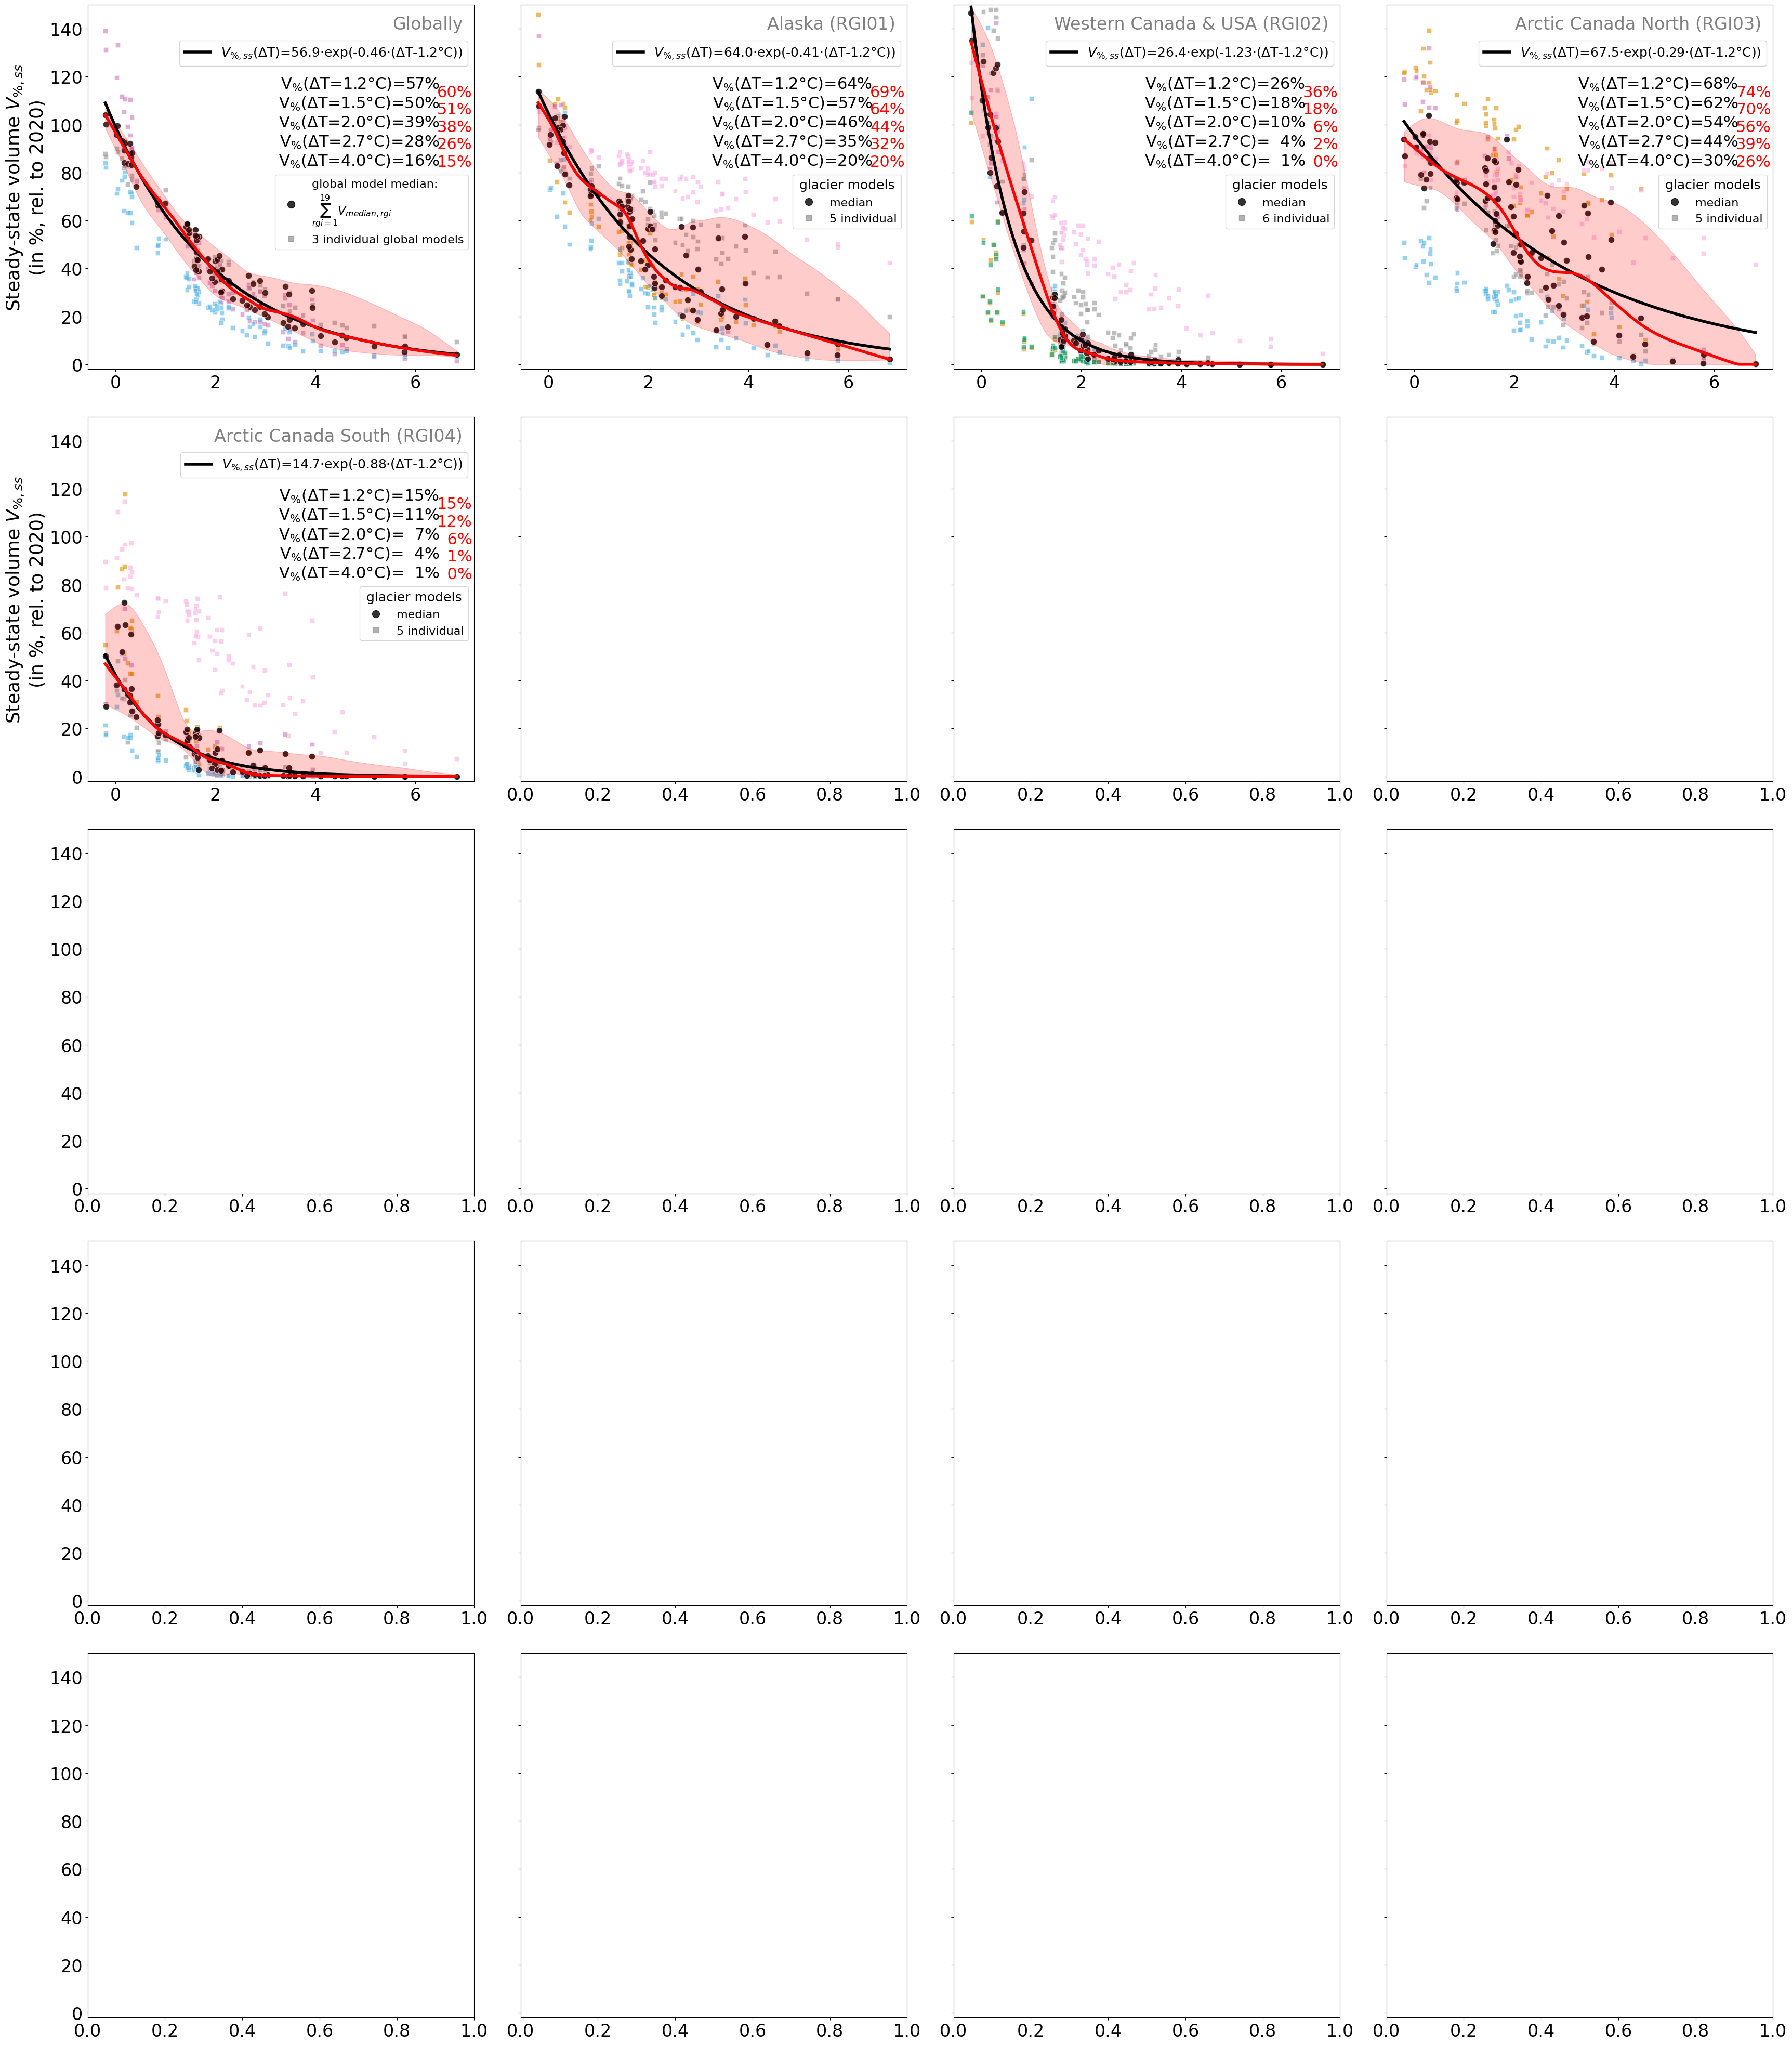

In [115]:

# download it here https://cluster.klima.uni-bremen.de/~lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc
# and change the path to your local path
DATE = 'Jun29' #'apr04' (has OGGM runaway effect of glaciers inside)
fill_option = 'repeat_last_100yrs' #'repeat_last_20yrs'
add_lowess=True
#avg_over = '100yr'
avg_over = '100yr'
fit_to_median=True # False
temp_ch = '' #'regional_glacier'
shift_years = True
temp_above_0_8_sel = False

test = 2
if test: 
    sim_years = [5000]
    #qs = [0.05,0.25,0.5,0.75,0.95]
    qs = [0.05, #0.25,
          0.5,
          #0.75,
          0.95]

    N = 50#0 #100 #100 #100 #100#100  # 300
    it = 1

    rgi_regs_global = ['All','01',
                       '02', '03', '04']
                       #'04', '05', '06', '07',
    #                   '08', '09', '10', '11', '12', '13', '14', '15',
    #                   '16', '17', '18', '19']
    
else:
    sim_years = [50, 100, 300, 500, 5000]
    qs = [0.05,0.25,0.5,0.75,0.95]

    N = 100 #100 #100 #100 #100#100
    it = 2
    rgi_regs_global = ['All','01',
                       '02', '03', '04', '05', '06', '07',
                       '08', '09', '10', '11', '12', '13', '14', '15',
                       '16', '17', '18', '19']
write_exp_text = True


import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from moepy import lowess, eda

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
f_path_data ='/home/users/lschuster/GlacierMIP3/'

f_path ='/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/'
f_path_f = '/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/figures/'
try:
    path_merged_runs_scaled = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'
    path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)

except:
    path_merged_runs_scaled = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'
    path_merged_runs_scaled_extend = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
# --> comes from isimip3b_postprocessing_analysis/isimip3b_postprocess_to_monthly.ipynb
pd_global_temp_exp = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b.csv', index_col = 0)

from help_func import pal_models, model_order, d_reg_num_name, model_order_anonymous
# remove OGGM_v153 and Huss
hue_order_anonymous = []
hue_order = model_order[:-2] 
glac_models = hue_order 
pal_models = pal_models[:-2]
pal_models = sns.color_palette(pal_models)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])

print(hue_order, hue_order_anonymous)
pal_models

# test without Zeokllari and OGGM-VAS
sel = False
if sel:
    glac_models = ['James', 'Rounce', 'Compagno', 'Kraaijenbrink', 'GLIMB', 'OGGM_v16'] #, 'OGGM-VAS', 'Zekollari'] # OGGM_v153, Huss
    ds_reg_models = ds_reg_models.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

    # Let's take the median estimate from all glacier models for every RGI region and then do the sum:
else:    
    ds_reg_models = ds_reg_models.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3 #.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

# Let's take the median estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])
ds_reg_models_med_vol = ds_reg_models_vol.median(dim='model_author')
num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)', 5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)', 10:'(k)', 11:'(l)', 12:'(m)'} 


pd_global_temp_exp_glac = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)

def get_glob_temp_exp(region='global'):
    pd_global_temp_exp_glac = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)
    _p = pd_global_temp_exp_glac.loc[pd_global_temp_exp_glac.region == region]
    #print(_p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc'))
    _p = _p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc')
    return _p
np.testing.assert_allclose(get_glob_temp_exp(region='global')['temp_ch_ipcc'].values,
                                  pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()['temp_ch_ipcc'].values, rtol=1e-5)
import matplotlib
matplotlib.__version__

pd_rgi_stats_w_hugonnet = pd.read_csv(f'{f_path}rgi_vs_2020_volume_hugonnet_estimates.csv', index_col = [0])

ds_reg_yr_shift= xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/all_shifted_glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc')
ds_reg_yr_shift_vol = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3
ds_reg_yr_shift_vol_med = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3.median(dim='model_author')

show_color_models = True
plt.rc('font', size=24)  


# option A: choose 20-year period before and do the average!
import numpy as np
from scipy.optimize import curve_fit

#sim_year = 5000
# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!


#rgi_regs_global = ['03']# 
current_deltaT = 1.2
df_quantiles_l = []
sel_l = []
if shift_years:
    p_shift = '_shift_years_rel_2020'
else:
    p_shift = ''


    
for temp_above_0_8 in [temp_above_0_8_sel]: #,False]: True

    for version in ['simple']:
        jj=0
        if version == 'simple':
            def exponential_decay(x, a, b):
                # avoind overflow -> does not work ... 
                exp_values = -b * x
                #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
            param_bounds = ([0, 0], [1000, 5])
            pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                                    columns=['rgi_reg','year',
                                                             'a_simple', 'b_simple'])

        else:
            def exponential_decay(x, a, b,c,d):
                exp_values_b = -b * x
                #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

                exp_values_d = -d * x**2
                #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
            param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
            pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1),
                                                 columns=['rgi_reg','year',
                                                          'a_comp', 'b_comp',
                                                          'c_comp', 'd_comp'])
        for sim_year in sim_years: # 
            if temp_above_0_8:
                add= '_temp_above_0_8'
            else:
                add = ''
    
            if sim_year==5000:
                v_n = r'$V_{\%,ss}$'
                state = 'Steady-state volume'
            elif sim_year == 50:
                v_n = r'$V_{\%,50yr}$'
                state = 'Volume after 50 years'
            elif sim_year == 100:
                v_n = r'$V_{\%,100yr}$'
                state = 'Volume after 100 years'
            elif sim_year == 300:
                v_n = r'$V_{\%,300yr}$'
                state = 'Volume after 300 years'
            elif sim_year ==500:
                v_n = r'$V_{\%,500yr}$'
                state = 'Volume after 500 years'
            if avg_over=='100yr':
                sim_year_avg = 100
            elif avg_over=='60yr':
                sim_year_avg = 60
            else:
                sim_year_avg = 20
            fig, axs = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey='row') #, sharex=True)
            if shift_years:
                ds_reg_models_med_vol_roll = ds_reg_yr_shift_vol_med.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_yr_shift_vol.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
            else:
                ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            for j, rgi_reg in enumerate(rgi_regs_global):
                if rgi_reg == 'All':
                    _rgi_reg = 'Globally'
                else:
                    _rgi_reg = rgi_reg
                vol_2020_reg = pd_rgi_stats_w_hugonnet.loc[_rgi_reg]['regional_volume_m3_2020']

                if j<4:
                    ax = axs[0][j]
                elif j <8:
                    ax = axs[1][j-4]
                elif j <12:
                    ax = axs[2][j-8]
                elif j <16:
                    ax = axs[3][j-12]
                elif j <20:
                    ax = axs[4][j-16]
                    
                region = f'RGI{rgi_reg}_glacier'

                if rgi_reg == 'All':
                    # get the temp.
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global_glacier')
                    if shift_years:
                        # we have done the dropping of everything after 4950, so the last year should be fine 
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(year_after_2020=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(year_after_2020=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/vol_2020_reg
                        ds_t = 100*ds_reg_models_med_vol_sel/vol_2020_reg # TODO checkt that this is the sum ... 
                    
                    else:
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sum(dim='rgi_reg', min_count=19)

                        ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')
                    
                    pd_tt2 = ds_t2.to_dataframe()
                    try:
                        pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                    except:
                        pass
                    pd_tt2 = pd_tt2.reset_index()
                else:
                    # get the temp. 
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region=region)

                    if fit_to_median:
                        if shift_years:
                            # TODO
                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/vol_2020_reg
                        else:
                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                        ds_t = ds_t2.median(dim='model_author') 

                        pd_tt2 = ds_t2.to_dataframe()
                        try:
                            pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                        except:
                            pass
                        pd_tt2 = pd_tt2.reset_index()
                    else:
                        if shift_years:
                            # TODO
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/vol_2020_reg
                        else:
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                pd_tt = ds_t.to_dataframe()
                try:
                    pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
                except:
                    pass
                pd_tt = pd_tt.reset_index()
                # much better if we create a gcm_period_scenario column to later assign the correct temp. series ... 
                pd_global_temp_exp_m_r = pd_global_temp_exp_m.reset_index()
                pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario'] = pd_global_temp_exp_m_r['gcm'] +'_'+pd_global_temp_exp_m_r['period_scenario']
                pd_global_temp_exp_m_r.index = pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario']
                pd_tt2['gcm'+'_'+'period_scenario'] = pd_tt2['gcm'] +'_'+pd_tt2['period_scenario']
                pd_tt2.index = pd_tt2['gcm'+'_'+'period_scenario']
                pd_tt2.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
                pd_tt2 = pd_tt2.reset_index(drop=True)

                pd_tt['gcm'+'_'+'period_scenario'] = pd_tt['gcm'] +'_'+pd_tt['period_scenario']
                pd_tt.index = pd_tt['gcm'+'_'+'period_scenario']
                pd_tt.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
                pd_tt = pd_tt.reset_index(drop=True)
                
                wrong = False
                if wrong: 
                    if rgi_reg == 'All':
                        #pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        pd_tt = pd_tt.groupby(['gcm', 'period_scenario']).mean()
                        pd_tt.loc[pd_global_temp_exp_m.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m.temp_ch_ipcc
                        pd_tt = pd_tt.reset_index()
                        for m in pd_tt2.model_author.unique():
                            pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    else:
                        if fit_to_median:
                            #pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                            pd_tt = pd_tt.groupby(['gcm', 'period_scenario']).mean()
                            pd_tt.loc[pd_global_temp_exp_m.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m.temp_ch_ipcc
                            pd_tt = pd_tt.reset_index()
                            for m in pd_tt2.model_author.unique():
                                pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        else:
                            for m in pd_tt.model_author.unique():
                                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values

                pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
                # if I want to remove the very uncertain experiments,
                # I still want to keep those that are near to 
                # 1.2°C. However, there are no experiments directly at 1.2°C
                # and only one at +1, so, we should rather do the fit with >= +0.8°C
                if temp_above_0_8:
                    pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
                temp = pd_tt_above0['temp_ch_ipcc'].values

                q = 'volume_m3' # this is actually the 'relative volume change (in %)'
                rel_vol = pd_tt_above0[q].values

                if rgi_reg == 'All':
                    ax.text(0.97, 0.97, 'Globally', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')
                else:
                    nam = d_reg_num_name[rgi_reg]
                    ax.text(0.97, 0.97, f'{nam} (RGI{rgi_reg})', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')

                ax.set_ylabel(f'{state} '+f'{v_n}'+'\n(in %, rel. to 2020)', fontsize=26)

                if show_color_models:                    
                    if rgi_reg=='All':
                        pd_ttx = pd_tt2
                        pd_ttxx = pd_tt
                        # add legend...
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0],
                                       label='global model median:\n'+r'$\sum_{rgi=1}^{19} V_{median,rgi}$',
                                       color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual global models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)
                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, loc = 'upper right', fontsize=16, bbox_to_anchor=(1,0.55))
                    else:
                        if fit_to_median:
                            pd_ttx = pd_tt2
                            pd_ttxx = pd_tt
                        else:
                            pd_ttx = pd_tt
                            pd_ttxx = pd_tt[['temp_ch_ipcc', 'volume_m3']].groupby(['temp_ch_ipcc']).median().reset_index()
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)

                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, title='glacier models',
                                      loc = 'upper right', fontsize=16, title_fontsize=18, bbox_to_anchor=(1,0.55))
                    sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                                    y='volume_m3', #'volume (km3)',
                                    data = pd_ttx,
                                    hue_order=hue_order,
                                    hue='model_author',
                                    palette=pal_models,
                                    legend=False, s=40, alpha = 0.6, marker='s')
                    # if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_ttxx,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.8)
                        
                else:
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_tt,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.3)
                if temp_ch == 'regional_glacier':
                    ax.set_xlabel(r'$\Delta$T$_{reg,glacier-area}$ (°C, compared to pre-industrial)')
                else:
                    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
                #plt.plot(temp, rel_vol, 'o', alpha =0.2)

                x,y = temp, rel_vol
                    
                if rgi_reg=='04':
                    xx,yy = x,y
                # Perform the curve fitting
                popt, pcov = curve_fit(exponential_decay, x-current_deltaT, y,loss='soft_l1', f_scale=0.1, bounds = param_bounds)  # Lower and upper bounds for a and b)
                # Generate a higher density x range for plotting the fitted curve
                x_dense = np.linspace(x.min(), x.max(), 100)
                fit_vars = popt #c_opt

                # Extract the optimized parameters
                if version == 'simple':
                    a_opt, b_opt = popt #c_opt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)

                    func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$ΔT))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    #r'V$_{ss,rel}$(ΔT)=a$\cdot$e'+r'$^{-b\cdot(ΔT-1.2)}$'
                    if current_deltaT !=0:
                        if temp_ch == 'regional_glacier':
                            #func_vars= r'$V_{\%}$(ΔT$_{reg}$)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*('+r'ΔT$_{reg}$'+f'-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT$_{reg}$)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT$_{reg}$-'+f'{current_deltaT}°C))'

                            fs_label = 14
                        else:
                            #func_vars= r'$V_{\%}$(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT-'+f'{current_deltaT}°C))'
                            fs_label = 18
                        #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                else:
                    a_opt, b_opt, c_opt, d_opt = popt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                    func_vars= 'V%(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                ax.plot(x_dense, y_fitted, '-', label=func_vars,
                        color='black', lw=4)
                if write_exp_text: 
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        if version == 'simple':
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt).round(0)) #c_opt
                            num_x=0.91
                            num_y=0.5
                        else:
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                            num_x=0.91
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        if temp_ch == 'regional_glacier':
                            text = text+r'V$_{\%}$'+r'(ΔT$_{reg}$='+f'+{temp}°C)'+f'={Ttemp_vol}%\n'
                        else:
                            text = text+r'V$_{\%}$'+f'(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
                    ax.text(num_x, num_y, text, color='black',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                #except:
                #    pass

                ax.legend(fontsize=fs_label, loc='upper right', bbox_to_anchor=(1,0.92))
                #if j<2:
                ax.add_artist(leg2)

                if version == 'simple':
                    pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
                else:
                    pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
                jj+=1

                ax.set_ylim([-2,150])
                if temp_ch == 'regional_glacier':
                    ax.set_xlim([pd_global_temp_exp_glac['temp_ch_ipcc'].min()*1.001, pd_global_temp_exp_glac['temp_ch_ipcc'].max()*1.001])
                    ax.set_ylim([-2,400])
                else:
                    ax.set_ylim([-2,150])

                if j<16:
                    ax.set_xlabel('')
                if j not in [0,4,8,12,16,20]:
                    ax.set_ylabel('')
                if add_lowess:
                    eval_x =np.arange(x.min().round(1), x.max()*1.001, 0.05)
                    df_quantiles_ll = []
                    for frac in np.arange(0.3,1,0.01):
                        df_quantiles = lowess.quantile_model(x, y, x_pred=np.concatenate([eval_x,x]),
                                                             frac=frac, num_fits=N, robust_iters=it,
                                                         qs=qs)
                        q = 0.5 # selection criteria are still done via the median at the moment ... 
                        lowi = df_quantiles[q].copy()
                        lowi[lowi<0] = 0
                        #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                        #        alpha = 0.8, lw=1, color='grey', zorder=-1)
                        df_quantiles['frac'] = frac
                        df_quantiles['region'] = rgi_reg
                        df_quantiles['year'] = sim_year
                        df_quantiles['fit_to_median'] = fit_to_median
                        df_quantiles['temp_ch'] = temp_ch
                        df_quantiles['avg_over'] = avg_over
                        df_quantiles['it'] = it
                        df_quantiles['N'] = N
                        df_quantiles['fit_opt'] = 'lowess_fit'
                        df_quantiles['shift_years_2020'] = shift_years
                        #df_quantiles['version'] = version
                        #df_quantiles['y'] = np.NaN
                        df_quantiles['y'] = np.concatenate([np.repeat(np.NaN, len(eval_x)), y])
                        #df_quantiles.iloc[len(eval_x):,'y'] = y
                        #df_quantiles.loc[df_quantiles.iloc[len(eval_x):].index,'y'] = y
                        df_quantiles['add'] = add
                        df_quantiles[f'min_{q}_diff'] = (df_quantiles[q].iloc[:len(eval_x)-1].values - df_quantiles[q].iloc[1:len(eval_x)].values).min()
                        df_quantiles[f'min_{q}'] = df_quantiles[q].min()
                        df_quantiles[f'min_{q}_diff_above_zero'] = (lowi.iloc[:len(eval_x)-1].values - lowi.iloc[1:len(eval_x)].values).min()
                        df_quantiles['median_absolute_deviation'] =  np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()
                        df_quantiles['rmse'] =  np.sqrt(np.mean((df_quantiles.iloc[len(eval_x):]['y']-df_quantiles.iloc[len(eval_x):][0.5])**2))
                        #np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()

                        if np.all(df_quantiles[f'min_{q}_diff_above_zero']>=0):
                            df_quantiles['algorithm_sel'] = 'only_decreasing'
                            if df_quantiles[q].min()>=0:
                                #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                                #    alpha = 0.8, lw=1, color='red', zorder=-1)
                                df_quantiles['algorithm_sel'] = 'non_negative_and_decreasing'
                        else:
                            df_quantiles['algorithm_sel'] = 'not_selected'
                        df_quantiles_l.append(df_quantiles)
                        df_quantiles_ll.append(df_quantiles)
                    df_quantiles_ll_concat = pd.concat(df_quantiles_ll)
                    #sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac == df_quantiles_ll_concat[f'min_{q}_diff_above_zero'].min().frac]
                    if (df_quantiles_ll_concat['min_0.5'].max()>=0) and len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing']
                        min_mad = _sel['median_absolute_deviation'].min()
                        min_rmse = _sel['rmse'].min()

                        max_diff_above_zero = _sel[f'min_{q}_diff_above_zero'].max()

                        #sel = _sel.loc[_sel.median_absolute_deviation == min_mad]
                        sel = _sel.loc[_sel.rmse == min_rmse]
                        sel = sel.sort_values('x')
                        #ax.plot(sel.index, sel[0.5], color='darkgreen', lw=3)

                        #sel2 = _sel.loc[_sel[f'min_{q}_diff_above_zero'] == max_diff_above_zero]
                        #sel2 = sel2.sort_values('x')
                        #ax.plot(sel2.index, sel2[0.5], color='blue', lw=3)

                    elif len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing']
                        max_min = _sel['min_0.5'].max()
                        sel = _sel.loc[_sel['min_0.5'] == max_min]
                        sel = sel.sort_values('x')
                        # set values below zero to zero 
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='orange', lw=3)
                    else:
                        # if nothing else work, just use the fit that is the most
                        # "monotonically" decreasing ... 
                        _max_min_diff =df_quantiles_ll_concat.groupby('frac')[f'min_{q}_diff_above_zero'].min()
                        frac = _max_min_diff.idxmax().round(3)
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac.round(3) == frac]
                        #_sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat[f'min_{q}_diff_above_zero']]
                        sel = _sel.sort_values('x')
                        # set values below zero to zero 
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='yellow', lw=3)
                        
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        num_y=0.5
                        Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, 0.5].round(0)) #c_opt
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        text = text + f'{Ttemp_vol}%\n'
                    ax.text(0.995, num_y, text, color='red',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                    print(rgi_reg, sel.frac.unique())
                    for qq in qs:
                        sel.loc[sel[qq]<0, qq] = 0
                    ax.plot(sel.index, sel[0.5], color='red', lw=4)
                    if qs == [0.05,#0.25,
                              0.5,#0.75,
                              0.95]:

                        #ax.fill_between(sel.index, sel[0.25], sel[0.75], color='red', alpha = 0.2)
                        ax.fill_between(sel.index, sel[0.05], sel[0.95], color='red', alpha = 0.2)
                    sel_l.append(sel)
            plt.tight_layout()
            if fit_to_median:
                add = add + '_fit_to_median'
            if add_lowess:
                add = add + '_lowess_added'
            if len(qs)>1:
                add = add + '_quantiles_added'
            if temp_ch != 'regional_glacier':
                plt.savefig(f'{f_path_f}2_glacier_volume_yr{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg.png')
            else:
                plt.savefig(f'{f_path_f}2_glacier_volume_yr{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg_reg_glacier_temp_ch.png')
            if not test: 
                plt.close()
            
    pd_quantiles_concat = pd.concat(df_quantiles_l)
    pd_sel = pd.concat(sel_l)
    if temp_ch != 'regional_glacier':
        pd_exp_decay_fits_simple.to_csv(f'{f_path}fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
        pd_quantiles_concat.to_csv(f'{f_path}fitted_lowess{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
        pd_sel.to_csv(f'{f_path}fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
    else:
        pd_exp_decay_fits_simple.to_csv(f'{f_path}fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_quantiles_concat.to_csv(f'{f_path}fitted_lowess{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_sel.to_csv(f'{f_path}fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')

    #pd_exp_decay_fits_adv.to_csv(f'fitted_glacier_response_to_global_temp_ch_complex_20yr_avg_period{add}.csv')

['Rounce', 'Compagno', 'Zekollari', 'OGGM_v16', 'OGGM-VAS', 'GLIMB', 'Kraaijenbrink', 'James', 'CISM2'] ['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8', 'model 9']


100%|████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.20s/it]


All [0.33]


100%|████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.33s/it]


01 [0.83]


100%|████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.53s/it]


02 [0.3]


100%|████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.20s/it]


03 [0.31]


100%|████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.33s/it]


04 [0.3]


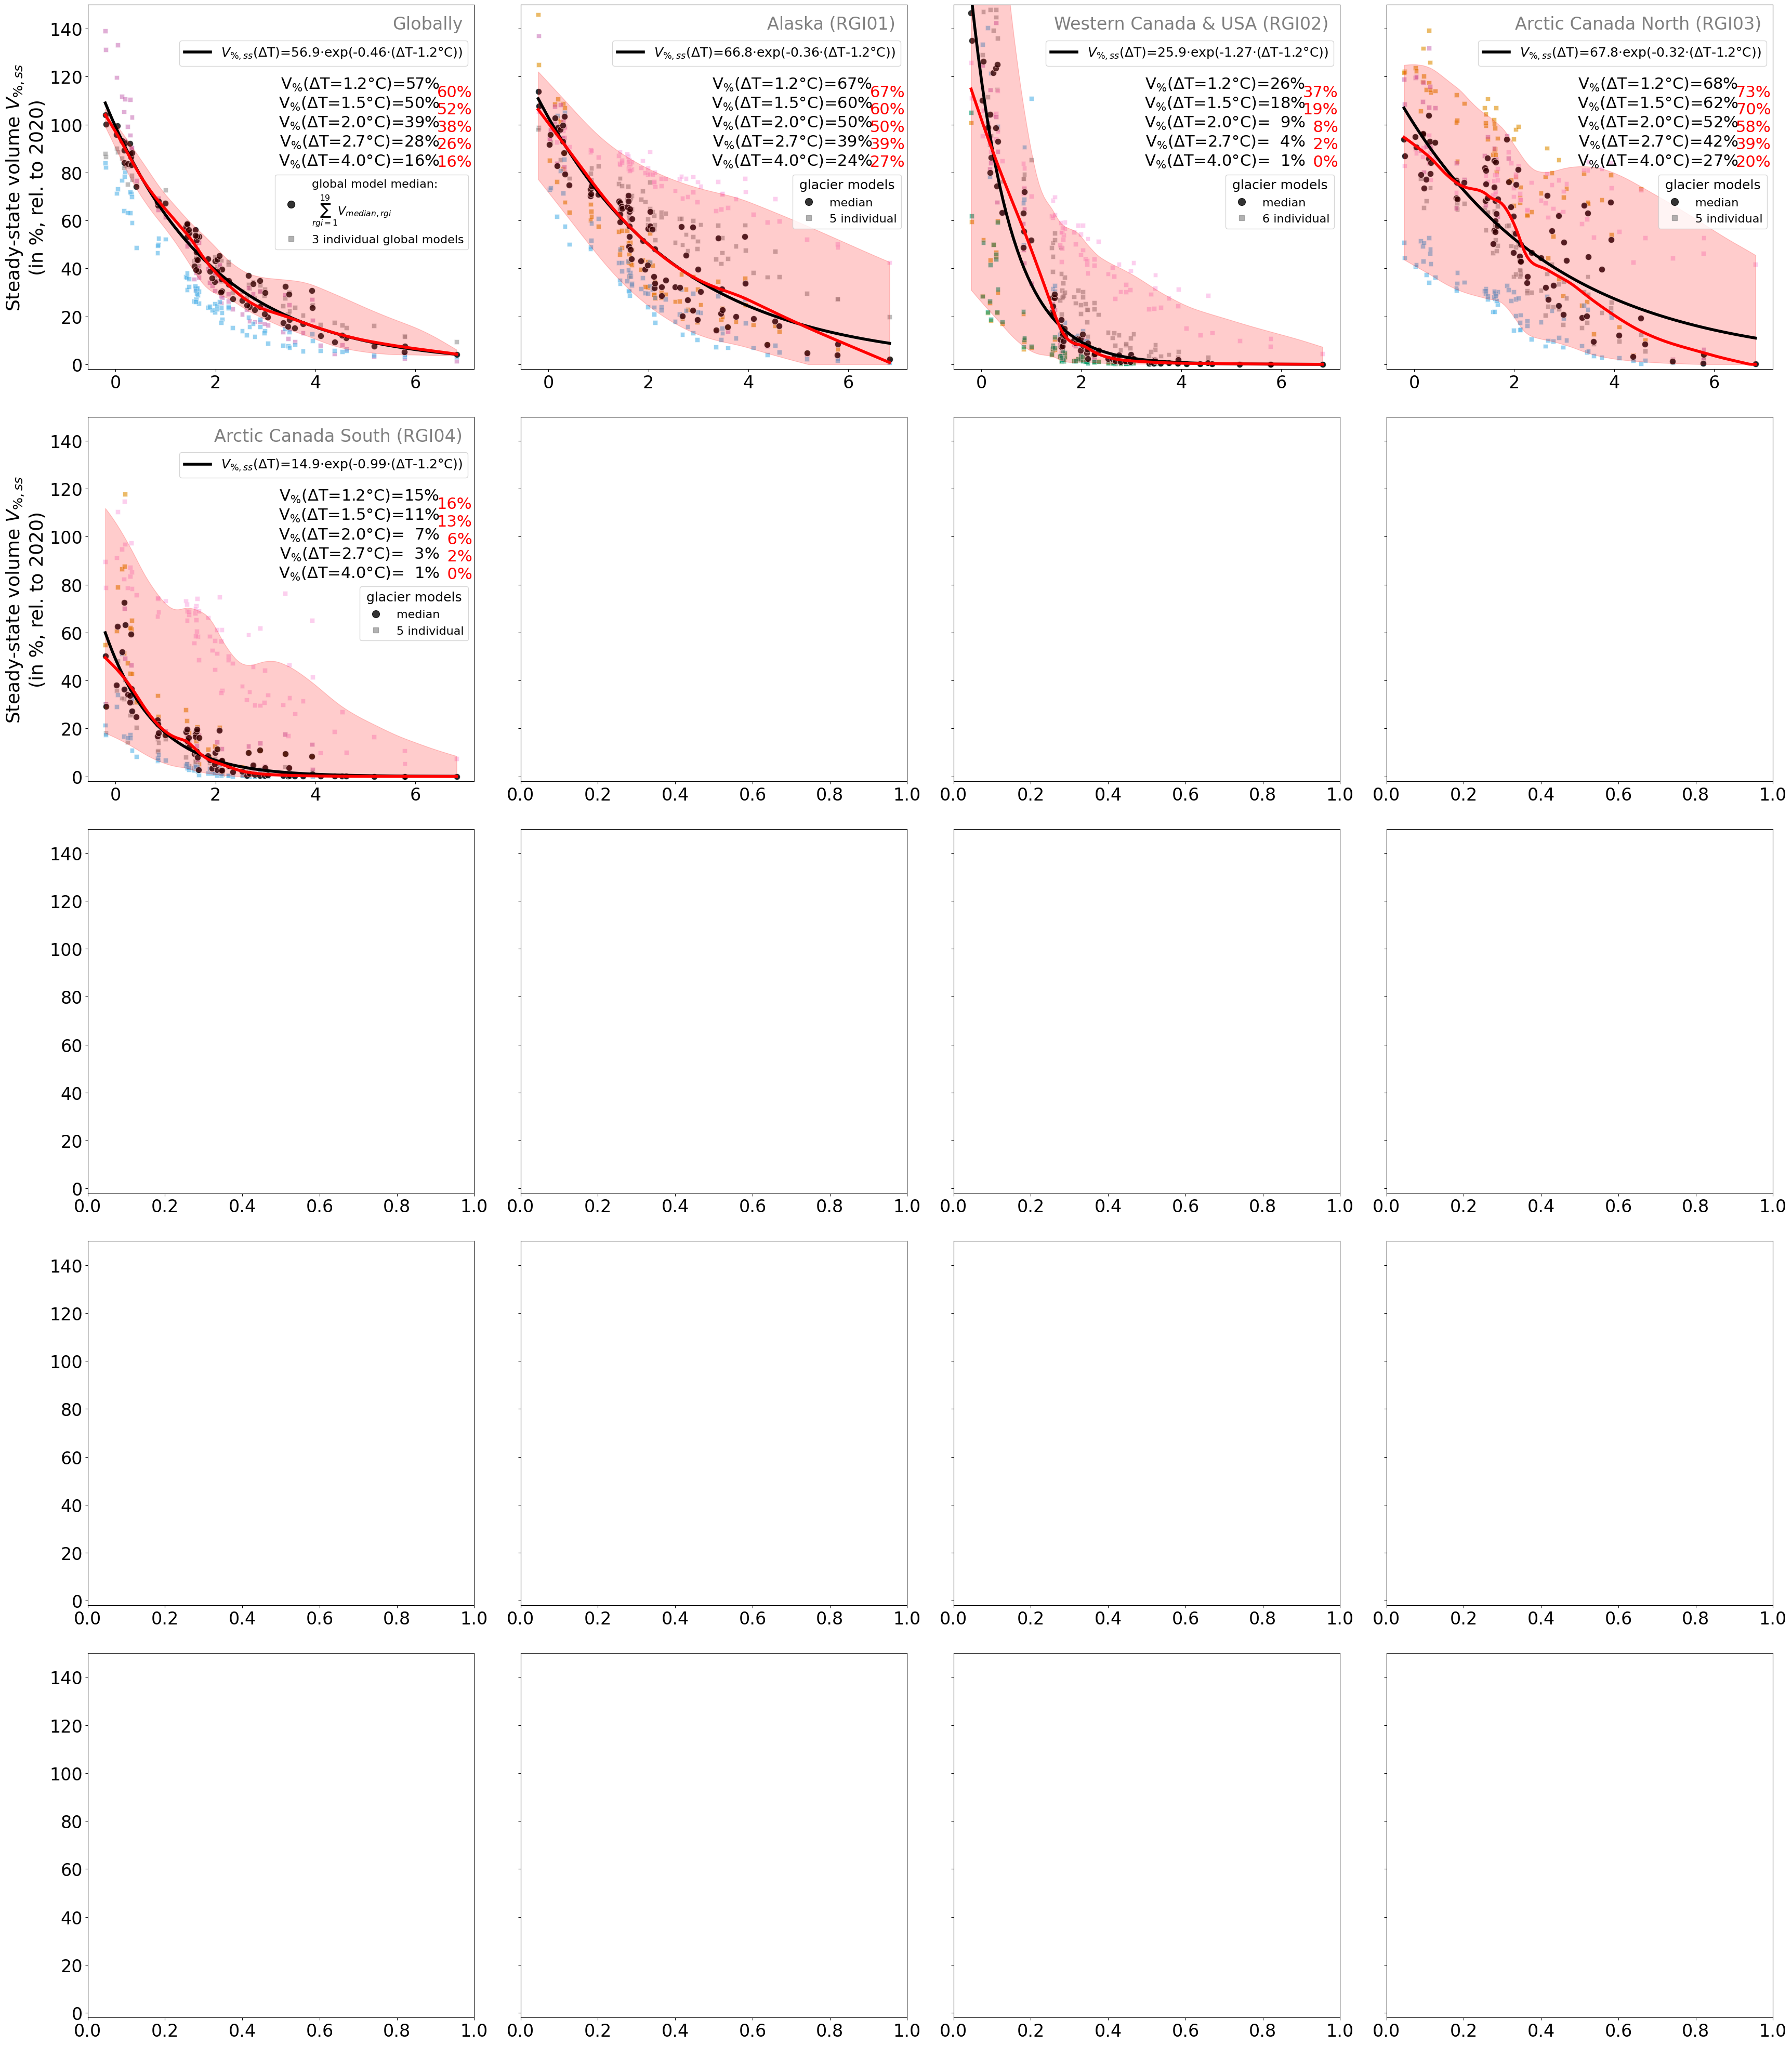

In [112]:

import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from moepy import lowess, eda

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
f_path_data ='/home/users/lschuster/GlacierMIP3/'

f_path ='/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/'
f_path_f = '/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/figures/'
try:
    path_merged_runs_scaled = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'
    path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)

except:
    path_merged_runs_scaled = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'
    path_merged_runs_scaled_extend = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
# --> comes from isimip3b_postprocessing_analysis/isimip3b_postprocess_to_monthly.ipynb
pd_global_temp_exp = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b.csv', index_col = 0)

from help_func import pal_models, model_order, d_reg_num_name, model_order_anonymous
# remove OGGM_v153 and Huss
hue_order_anonymous = []
hue_order = model_order[:-2] 
glac_models = hue_order 
pal_models = pal_models[:-2]
pal_models = sns.color_palette(pal_models)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])

print(hue_order, hue_order_anonymous)
pal_models

# test without Zeokllari and OGGM-VAS
sel = False
if sel:
    glac_models = ['James', 'Rounce', 'Compagno', 'Kraaijenbrink', 'GLIMB', 'OGGM_v16'] #, 'OGGM-VAS', 'Zekollari'] # OGGM_v153, Huss
    ds_reg_models = ds_reg_models.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

    # Let's take the median estimate from all glacier models for every RGI region and then do the sum:
else:    
    ds_reg_models = ds_reg_models.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3 #.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

# Let's take the median estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])
ds_reg_models_med_vol = ds_reg_models_vol.median(dim='model_author')
num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)', 5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)', 10:'(k)', 11:'(l)', 12:'(m)'} 


pd_global_temp_exp_glac = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)

def get_glob_temp_exp(region='global'):
    pd_global_temp_exp_glac = pd.read_csv(f'{f_path_data}data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)
    _p = pd_global_temp_exp_glac.loc[pd_global_temp_exp_glac.region == region]
    #print(_p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc'))
    _p = _p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc')
    return _p
np.testing.assert_allclose(get_glob_temp_exp(region='global')['temp_ch_ipcc'].values,
                                  pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()['temp_ch_ipcc'].values, rtol=1e-5)
import matplotlib
matplotlib.__version__

pd_rgi_stats_w_hugonnet = pd.read_csv(f'{f_path}rgi_vs_2020_volume_hugonnet_estimates.csv', index_col = [0])

ds_reg_yr_shift= xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/all_shifted_glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc')
ds_reg_yr_shift_vol = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3
ds_reg_yr_shift_vol_med = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3.median(dim='model_author')

show_color_models = True
plt.rc('font', size=24)  


# option A: choose 20-year period before and do the average!
import numpy as np
from scipy.optimize import curve_fit

#sim_year = 5000
# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!


#rgi_regs_global = ['03']# 
current_deltaT = 1.2
df_quantiles_l = []
sel_l = []
if shift_years:
    p_shift = '_shift_years_rel_2020'
else:
    p_shift = ''


    
for temp_above_0_8 in [temp_above_0_8_sel]: #,False]: True

    for version in ['simple']:
        jj=0
        if version == 'simple':
            def exponential_decay(x, a, b):
                # avoind overflow -> does not work ... 
                exp_values = -b * x
                #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
            param_bounds = ([0, 0], [1000, 5])
            pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                                    columns=['rgi_reg','year',
                                                             'a_simple', 'b_simple'])

        else:
            def exponential_decay(x, a, b,c,d):
                exp_values_b = -b * x
                #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

                exp_values_d = -d * x**2
                #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
            param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
            pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1),
                                                 columns=['rgi_reg','year',
                                                          'a_comp', 'b_comp',
                                                          'c_comp', 'd_comp'])
        for sim_year in sim_years: # 
            if temp_above_0_8:
                add= '_temp_above_0_8'
            else:
                add = ''
    
            if sim_year==5000:
                v_n = r'$V_{\%,ss}$'
                state = 'Steady-state volume'
            elif sim_year == 50:
                v_n = r'$V_{\%,50yr}$'
                state = 'Volume after 50 years'
            elif sim_year == 100:
                v_n = r'$V_{\%,100yr}$'
                state = 'Volume after 100 years'
            elif sim_year == 300:
                v_n = r'$V_{\%,300yr}$'
                state = 'Volume after 300 years'
            elif sim_year ==500:
                v_n = r'$V_{\%,500yr}$'
                state = 'Volume after 500 years'
            if avg_over=='100yr':
                sim_year_avg = 100
            elif avg_over=='60yr':
                sim_year_avg = 60
            else:
                sim_year_avg = 20
            fig, axs = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey='row') #, sharex=True)
            if shift_years:
                ds_reg_models_med_vol_roll = ds_reg_yr_shift_vol_med.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_yr_shift_vol.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
            else:
                ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            for j, rgi_reg in enumerate(rgi_regs_global):
                if rgi_reg == 'All':
                    _rgi_reg = 'Globally'
                else:
                    _rgi_reg = rgi_reg
                vol_2020_reg = pd_rgi_stats_w_hugonnet.loc[_rgi_reg]['regional_volume_m3_2020']

                if j<4:
                    ax = axs[0][j]
                elif j <8:
                    ax = axs[1][j-4]
                elif j <12:
                    ax = axs[2][j-8]
                elif j <16:
                    ax = axs[3][j-12]
                elif j <20:
                    ax = axs[4][j-16]
                    
                region = f'RGI{rgi_reg}_glacier'

                if rgi_reg == 'All':
                    # get the temp.
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global_glacier')
                    if shift_years:
                        # we have done the dropping of everything after 4950, so the last year should be fine 
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(year_after_2020=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(year_after_2020=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/vol_2020_reg
                        ds_t = 100*ds_reg_models_med_vol_sel/vol_2020_reg # TODO checkt that this is the sum ... 
                    
                    else:
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sum(dim='rgi_reg', min_count=19)

                        ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')
                    
                    pd_tt2 = ds_t2.to_dataframe()
                    try:
                        pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                    except:
                        pass
                    pd_tt2 = pd_tt2.reset_index()
                else:
                    # get the temp. 
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region=region)

                    if fit_to_median:
                        if shift_years:
                            # TODO
                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/vol_2020_reg
                        else:
                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                        ds_t = ds_t2.median(dim='model_author') 

                        pd_tt2 = ds_t2.to_dataframe()
                        try:
                            pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                        except:
                            pass
                        pd_tt2 = pd_tt2.reset_index()
                    else:
                        if shift_years:
                            # TODO
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/vol_2020_reg
                        else:
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                pd_tt = ds_t.to_dataframe()
                try:
                    pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
                except:
                    pass
                pd_tt = pd_tt.reset_index()
                # much better if we create a gcm_period_scenario column to later assign the correct temp. series ... 
                pd_global_temp_exp_m_r = pd_global_temp_exp_m.reset_index()
                pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario'] = pd_global_temp_exp_m_r['gcm'] +'_'+pd_global_temp_exp_m_r['period_scenario']
                pd_global_temp_exp_m_r.index = pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario']
                pd_tt2['gcm'+'_'+'period_scenario'] = pd_tt2['gcm'] +'_'+pd_tt2['period_scenario']
                pd_tt2.index = pd_tt2['gcm'+'_'+'period_scenario']
                pd_tt2.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
                pd_tt2 = pd_tt2.reset_index(drop=True)

                pd_tt['gcm'+'_'+'period_scenario'] = pd_tt['gcm'] +'_'+pd_tt['period_scenario']
                pd_tt.index = pd_tt['gcm'+'_'+'period_scenario']
                pd_tt.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
                pd_tt = pd_tt.reset_index(drop=True)
                
                wrong = False
                if wrong: 
                    if rgi_reg == 'All':
                        #pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        pd_tt = pd_tt.groupby(['gcm', 'period_scenario']).mean()
                        pd_tt.loc[pd_global_temp_exp_m.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m.temp_ch_ipcc
                        pd_tt = pd_tt.reset_index()
                        for m in pd_tt2.model_author.unique():
                            pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    else:
                        if fit_to_median:
                            #pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                            pd_tt = pd_tt.groupby(['gcm', 'period_scenario']).mean()
                            pd_tt.loc[pd_global_temp_exp_m.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m.temp_ch_ipcc
                            pd_tt = pd_tt.reset_index()
                            for m in pd_tt2.model_author.unique():
                                pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        else:
                            for m in pd_tt.model_author.unique():
                                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values

                pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
                # if I want to remove the very uncertain experiments,
                # I still want to keep those that are near to 
                # 1.2°C. However, there are no experiments directly at 1.2°C
                # and only one at +1, so, we should rather do the fit with >= +0.8°C
                if temp_above_0_8:
                    pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
                temp = pd_tt_above0['temp_ch_ipcc'].values

                q = 'volume_m3' # this is actually the 'relative volume change (in %)'
                rel_vol = pd_tt_above0[q].values

                if rgi_reg == 'All':
                    ax.text(0.97, 0.97, 'Globally', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')
                else:
                    nam = d_reg_num_name[rgi_reg]
                    ax.text(0.97, 0.97, f'{nam} (RGI{rgi_reg})', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')

                ax.set_ylabel(f'{state} '+f'{v_n}'+'\n(in %, rel. to 2020)', fontsize=26)

                if show_color_models:                    
                    if rgi_reg=='All':
                        pd_ttx = pd_tt2
                        pd_ttxx = pd_tt
                        # add legend...
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0],
                                       label='global model median:\n'+r'$\sum_{rgi=1}^{19} V_{median,rgi}$',
                                       color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual global models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)
                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, loc = 'upper right', fontsize=16, bbox_to_anchor=(1,0.55))
                    else:
                        if fit_to_median:
                            pd_ttx = pd_tt2
                            pd_ttxx = pd_tt
                        else:
                            pd_ttx = pd_tt
                            pd_ttxx = pd_tt[['temp_ch_ipcc', 'volume_m3']].groupby(['temp_ch_ipcc']).median().reset_index()
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)

                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, title='glacier models',
                                      loc = 'upper right', fontsize=16, title_fontsize=18, bbox_to_anchor=(1,0.55))
                    sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                                    y='volume_m3', #'volume (km3)',
                                    data = pd_ttx,
                                    hue_order=hue_order,
                                    hue='model_author',
                                    palette=pal_models,
                                    legend=False, s=40, alpha = 0.6, marker='s')
                    # if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_ttxx,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.8)
                        
                else:
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_tt,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.3)
                if temp_ch == 'regional_glacier':
                    ax.set_xlabel(r'$\Delta$T$_{reg,glacier-area}$ (°C, compared to pre-industrial)')
                else:
                    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
                #plt.plot(temp, rel_vol, 'o', alpha =0.2)

                x,y = temp, rel_vol
                    
                if rgi_reg=='04':
                    xx,yy = x,y
                # Perform the curve fitting
                popt, pcov = curve_fit(exponential_decay, x-current_deltaT, y,loss='soft_l1', f_scale=0.1, bounds = param_bounds)  # Lower and upper bounds for a and b)
                # Generate a higher density x range for plotting the fitted curve
                x_dense = np.linspace(x.min(), x.max(), 100)
                fit_vars = popt #c_opt

                # Extract the optimized parameters
                if version == 'simple':
                    a_opt, b_opt = popt #c_opt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)

                    func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$ΔT))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    #r'V$_{ss,rel}$(ΔT)=a$\cdot$e'+r'$^{-b\cdot(ΔT-1.2)}$'
                    if current_deltaT !=0:
                        if temp_ch == 'regional_glacier':
                            #func_vars= r'$V_{\%}$(ΔT$_{reg}$)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*('+r'ΔT$_{reg}$'+f'-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT$_{reg}$)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT$_{reg}$-'+f'{current_deltaT}°C))'

                            fs_label = 14
                        else:
                            #func_vars= r'$V_{\%}$(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT-'+f'{current_deltaT}°C))'
                            fs_label = 18
                        #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                else:
                    a_opt, b_opt, c_opt, d_opt = popt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                    func_vars= 'V%(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                ax.plot(x_dense, y_fitted, '-', label=func_vars,
                        color='black', lw=4)
                if write_exp_text: 
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        if version == 'simple':
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt).round(0)) #c_opt
                            num_x=0.91
                            num_y=0.5
                        else:
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                            num_x=0.91
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        if temp_ch == 'regional_glacier':
                            text = text+r'V$_{\%}$'+r'(ΔT$_{reg}$='+f'+{temp}°C)'+f'={Ttemp_vol}%\n'
                        else:
                            text = text+r'V$_{\%}$'+f'(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
                    ax.text(num_x, num_y, text, color='black',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                #except:
                #    pass

                ax.legend(fontsize=fs_label, loc='upper right', bbox_to_anchor=(1,0.92))
                #if j<2:
                ax.add_artist(leg2)

                if version == 'simple':
                    pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
                else:
                    pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
                jj+=1

                ax.set_ylim([-2,150])
                if temp_ch == 'regional_glacier':
                    ax.set_xlim([pd_global_temp_exp_glac['temp_ch_ipcc'].min()*1.001, pd_global_temp_exp_glac['temp_ch_ipcc'].max()*1.001])
                    ax.set_ylim([-2,400])
                else:
                    ax.set_ylim([-2,150])

                if j<16:
                    ax.set_xlabel('')
                if j not in [0,4,8,12,16,20]:
                    ax.set_ylabel('')
                if add_lowess:
                    eval_x =np.arange(x.min().round(1), x.max()*1.001, 0.05)
                    df_quantiles_ll = []
                    for frac in np.arange(0.3,1,0.01):
                        df_quantiles = lowess.quantile_model(x, y, x_pred=np.concatenate([eval_x,x]),
                                                             frac=frac, num_fits=N, robust_iters=it,
                                                         qs=qs)
                        q = 0.5 # selection criteria are still done via the median at the moment ... 
                        lowi = df_quantiles[q].copy()
                        lowi[lowi<0] = 0
                        #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                        #        alpha = 0.8, lw=1, color='grey', zorder=-1)
                        df_quantiles['frac'] = frac
                        df_quantiles['region'] = rgi_reg
                        df_quantiles['year'] = sim_year
                        df_quantiles['fit_to_median'] = fit_to_median
                        df_quantiles['temp_ch'] = temp_ch
                        df_quantiles['avg_over'] = avg_over
                        df_quantiles['it'] = it
                        df_quantiles['N'] = N
                        df_quantiles['fit_opt'] = 'lowess_fit'
                        df_quantiles['shift_years_2020'] = shift_years
                        #df_quantiles['version'] = version
                        #df_quantiles['y'] = np.NaN
                        df_quantiles['y'] = np.concatenate([np.repeat(np.NaN, len(eval_x)), y])
                        #df_quantiles.iloc[len(eval_x):,'y'] = y
                        #df_quantiles.loc[df_quantiles.iloc[len(eval_x):].index,'y'] = y
                        df_quantiles['add'] = add
                        df_quantiles[f'min_{q}_diff'] = (df_quantiles[q].iloc[:len(eval_x)-1].values - df_quantiles[q].iloc[1:len(eval_x)].values).min()
                        df_quantiles[f'min_{q}'] = df_quantiles[q].min()
                        df_quantiles[f'min_{q}_diff_above_zero'] = (lowi.iloc[:len(eval_x)-1].values - lowi.iloc[1:len(eval_x)].values).min()
                        df_quantiles['median_absolute_deviation'] =  np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()
                        df_quantiles['rmse'] =  np.sqrt(np.mean((df_quantiles.iloc[len(eval_x):]['y']-df_quantiles.iloc[len(eval_x):][0.5])**2))
                        #np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()

                        if np.all(df_quantiles[f'min_{q}_diff_above_zero']>=0):
                            df_quantiles['algorithm_sel'] = 'only_decreasing'
                            if df_quantiles[q].min()>=0:
                                #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                                #    alpha = 0.8, lw=1, color='red', zorder=-1)
                                df_quantiles['algorithm_sel'] = 'non_negative_and_decreasing'
                        else:
                            df_quantiles['algorithm_sel'] = 'not_selected'
                        df_quantiles_l.append(df_quantiles)
                        df_quantiles_ll.append(df_quantiles)
                    df_quantiles_ll_concat = pd.concat(df_quantiles_ll)
                    #sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac == df_quantiles_ll_concat[f'min_{q}_diff_above_zero'].min().frac]
                    if (df_quantiles_ll_concat['min_0.5'].max()>=0) and len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing']
                        min_mad = _sel['median_absolute_deviation'].min()
                        min_rmse = _sel['rmse'].min()

                        max_diff_above_zero = _sel[f'min_{q}_diff_above_zero'].max()

                        #sel = _sel.loc[_sel.median_absolute_deviation == min_mad]
                        sel = _sel.loc[_sel.rmse == min_rmse]
                        sel = sel.sort_values('x')
                        #ax.plot(sel.index, sel[0.5], color='darkgreen', lw=3)

                        #sel2 = _sel.loc[_sel[f'min_{q}_diff_above_zero'] == max_diff_above_zero]
                        #sel2 = sel2.sort_values('x')
                        #ax.plot(sel2.index, sel2[0.5], color='blue', lw=3)

                    elif len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing']
                        max_min = _sel['min_0.5'].max()
                        sel = _sel.loc[_sel['min_0.5'] == max_min]
                        sel = sel.sort_values('x')
                        # set values below zero to zero 
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='orange', lw=3)
                    else:
                        # if nothing else work, just use the fit that is the most
                        # "monotonically" decreasing ... 
                        _max_min_diff =df_quantiles_ll_concat.groupby('frac')[f'min_{q}_diff_above_zero'].min()
                        frac = _max_min_diff.idxmax().round(3)
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac.round(3) == frac]
                        #_sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat[f'min_{q}_diff_above_zero']]
                        sel = _sel.sort_values('x')
                        # set values below zero to zero 
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='yellow', lw=3)
                        
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        num_y=0.5
                        Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, 0.5].round(0)) #c_opt
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        text = text + f'{Ttemp_vol}%\n'
                    ax.text(0.995, num_y, text, color='red',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                    print(rgi_reg, sel.frac.unique())
                    for qq in qs:
                        sel.loc[sel[qq]<0, qq] = 0
                    ax.plot(sel.index, sel[0.5], color='red', lw=4)
                    if qs == [0.05,#0.25,
                              0.5,#0.75,
                              0.95]:

                        #ax.fill_between(sel.index, sel[0.25], sel[0.75], color='red', alpha = 0.2)
                        ax.fill_between(sel.index, sel[0.05], sel[0.95], color='red', alpha = 0.2)
                    sel_l.append(sel)
            plt.tight_layout()
            if fit_to_median:
                add = add + '_fit_to_median'
            if add_lowess:
                add = add + '_lowess_added'
            if len(qs)>1:
                add = add + '_quantiles_added'
            if temp_ch != 'regional_glacier':
                plt.savefig(f'{f_path_f}2_glacier_volume_yr{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg.png')
            else:
                plt.savefig(f'{f_path_f}2_glacier_volume_yr{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg_reg_glacier_temp_ch.png')
            if not test: 
                plt.close()
            
    pd_quantiles_concat = pd.concat(df_quantiles_l)
    pd_sel = pd.concat(sel_l)
    if temp_ch != 'regional_glacier':
        pd_exp_decay_fits_simple.to_csv(f'{f_path}fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
        pd_quantiles_concat.to_csv(f'{f_path}fitted_lowess{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
        pd_sel.to_csv(f'{f_path}fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg.csv')
    else:
        pd_exp_decay_fits_simple.to_csv(f'{f_path}fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_quantiles_concat.to_csv(f'{f_path}fitted_lowess{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_sel.to_csv(f'{f_path}fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')

    #pd_exp_decay_fits_adv.to_csv(f'fitted_glacier_response_to_global_temp_ch_complex_20yr_avg_period{add}.csv')

### OLD 

In [2]:
# download it here https://cluster.klima.uni-bremen.de/~lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc
# and change the path to your local path
DATE = 'Jun29' #'apr04' (has OGGM runaway effect of glaciers inside)
fill_option = 'repeat_last_100yrs' #'repeat_last_20yrs'

import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from moepy import lowess, eda

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

try:
    path_merged_runs_scaled = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'
    path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)

except:
    path_merged_runs_scaled = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'
    path_merged_runs_scaled_extend = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
# --> comes from isimip3b_postprocessing_analysis/isimip3b_postprocess_to_monthly.ipynb
pd_global_temp_exp = pd.read_csv('../data/temp_ch_ipcc_isimip3b.csv', index_col = 0)

from help_func import pal_models, model_order, d_reg_num_name, model_order_anonymous
# remove OGGM_v153 and Huss
hue_order_anonymous = []
hue_order = model_order[:-2] 
glac_models = hue_order 
pal_models = pal_models[:-2]
pal_models = sns.color_palette(pal_models)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])

print(hue_order, hue_order_anonymous)
pal_models

# test without Zeokllari and OGGM-VAS
sel = False
if sel:
    glac_models = ['James', 'Rounce', 'Compagno', 'Kraaijenbrink', 'GLIMB', 'OGGM_v16'] #, 'OGGM-VAS', 'Zekollari'] # OGGM_v153, Huss
    ds_reg_models = ds_reg_models.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

    # Let's take the median estimate from all glacier models for every RGI region and then do the sum:
else:    
    ds_reg_models = ds_reg_models.sel(model_author=glac_models)
    ds_reg_models_vol = ds_reg_models.volume_m3 #.isel(simulation_year=slice(0,2000)) #['relative volume change (in %)']

# Let's take the median estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])
ds_reg_models_med_vol = ds_reg_models_vol.median(dim='model_author')
num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)', 5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)', 10:'(k)', 11:'(l)', 12:'(m)'} 


pd_global_temp_exp_glac = pd.read_csv('../data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)

def get_glob_temp_exp(region='global'):
    pd_global_temp_exp_glac = pd.read_csv('../data/temp_ch_ipcc_isimip3b_glacier_regionally.csv', index_col = 0)
    _p = pd_global_temp_exp_glac.loc[pd_global_temp_exp_glac.region == region]
    #print(_p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc'))
    _p = _p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc')
    return _p
np.testing.assert_allclose(get_glob_temp_exp(region='global')['temp_ch_ipcc'].values,
                                  pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()['temp_ch_ipcc'].values, rtol=1e-5)
import matplotlib
matplotlib.__version__

['Rounce', 'Compagno', 'Zekollari', 'OGGM_v16', 'OGGM-VAS', 'GLIMB', 'Kraaijenbrink', 'James', 'CISM2'] ['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8', 'model 9']


'3.5.3'

One of the two cells below can be deleted ...

In [17]:
show_color_models = True
plt.rc('font', size=24)  
add_lowess=True
#avg_over = '100yr'
avg_over = '100yr'
fit_to_median=True # False
temp_ch = '' #'regional_glacier'
# option A: choose 20-year period before and do the average!
import numpy as np
from scipy.optimize import curve_fit

#sim_year = 5000
# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!
rgi_regs_global = ['All','01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']

#rgi_regs_global = ['03']# 
current_deltaT = 1.2
df_quantiles_l = []
sel_l = []
for temp_above_0_8 in [True]: #,False]: True

    for version in ['simple']:
        jj=0
        if version == 'simple':
            def exponential_decay(x, a, b):
                # avoind overflow -> does not work ... 
                exp_values = -b * x
                #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
            param_bounds = ([0, 0], [1000, 5])
            pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                                    columns=['rgi_reg','year',
                                                             'a_simple', 'b_simple'])

        else:
            def exponential_decay(x, a, b,c,d):
                exp_values_b = -b * x
                #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

                exp_values_d = -d * x**2
                #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
            param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
            pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1),
                                                 columns=['rgi_reg','year',
                                                          'a_comp', 'b_comp',
                                                          'c_comp', 'd_comp'])
        for sim_year in [100, #300,
                         500, 
                         5000]: # 
            if temp_above_0_8:
                add= '_temp_above_0_8'
            else:
                add = ''
    
            if sim_year==5000:
                v_n = r'$V_{\%,ss}$'
                state = 'Steady-state volume'
            elif sim_year == 100:
                v_n = r'$V_{\%,100yr}$'
                state = 'Volume after 100 years'
            elif sim_year == 300:
                v_n = r'$V_{\%,300yr}$'
                state = 'Volume after 300 years'
            elif sim_year ==500:
                v_n = r'$V_{\%,500yr}$'
                state = 'Volume after 500 years'
            if avg_over=='100yr':
                sim_year_avg = 100
            elif avg_over=='60yr':
                sim_year_avg = 60
            else:
                sim_year_avg = 20
            fig, axs = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey='row') #, sharex=True)
            ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            for j, rgi_reg in enumerate(rgi_regs_global):
                if j<4:
                    ax = axs[0][j]
                elif j <8:
                    ax = axs[1][j-4]
                elif j <12:
                    ax = axs[2][j-8]
                elif j <16:
                    ax = axs[3][j-12]
                elif j <20:
                    ax = axs[4][j-16]
                    
                region = f'RGI{rgi_reg}_glacier'

                if rgi_reg == 'All':
                    # get the temp.
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global_glacier')
                    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
                    # make sure that we only take here global models ... 
                    ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(simulation_year=-1).dropna(dim='model_author')
                    ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sum(dim='rgi_reg', min_count=19)

                    ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')
                    
                    pd_tt2 = ds_t2.to_dataframe()
                    try:
                        pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                    except:
                        pass
                    pd_tt2 = pd_tt2.reset_index()
                else:
                    # get the temp. 
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region=region)

                    if fit_to_median:
                        #ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sel(rgi_reg=rgi_reg)
                        #ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                        
                        ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                        ds_t = ds_t2.median(dim='model_author') 

                        pd_tt2 = ds_t2.to_dataframe()
                        try:
                            pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                        except:
                            pass
                        pd_tt2 = pd_tt2.reset_index()
                    else:
                        ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                pd_tt = ds_t.to_dataframe()
                try:
                    pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
                except:
                    pass
                pd_tt = pd_tt.reset_index()

                if rgi_reg == 'All':
                    pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    for m in pd_tt2.model_author.unique():
                        pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                else:
                    if fit_to_median:
                        pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        for m in pd_tt2.model_author.unique():
                            pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    else:
                        for m in pd_tt.model_author.unique():
                            pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values

                pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
                # if I want to remove the very uncertain experiments,
                # I still want to keep those that are near to 
                # 1.2°C. However, there are no experiments directly at 1.2°C
                # and only one at +1, so, we should rather do the fit with >= +0.8°C
                if temp_above_0_8:
                    pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
                temp = pd_tt_above0['temp_ch_ipcc'].values

                q = 'volume_m3' # this is actually the 'relative volume change (in %)'
                rel_vol = pd_tt_above0[q].values

                if rgi_reg == 'All':
                    ax.text(0.97, 0.97, 'Globally', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')
                else:
                    nam = d_reg_num_name[rgi_reg]
                    ax.text(0.97, 0.97, f'{nam} (RGI{rgi_reg})', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')

                ax.set_ylabel(f'{state} '+f'{v_n}'+'\n(in %, relative to initial state)', fontsize=26)

                if show_color_models:                    
                    if rgi_reg=='All':
                        pd_ttx = pd_tt2
                        pd_ttxx = pd_tt
                        # add legend...
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0], label='global model median:\n'+r'$\sum_{rgi=1}^{19} V_{median,rgi}$', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual global models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)
                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, loc = 'upper right', fontsize=16, bbox_to_anchor=(1,0.55))
                    else:
                        if fit_to_median:
                            pd_ttx = pd_tt2
                            pd_ttxx = pd_tt
                        else:
                            pd_ttx = pd_tt
                            pd_ttxx = pd_tt[['temp_ch_ipcc', 'volume_m3']].groupby(['temp_ch_ipcc']).median().reset_index()
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)

                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, title='glacier models',
                                      loc = 'upper right', fontsize=16, title_fontsize=18, bbox_to_anchor=(1,0.55))
                    sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                                    y='volume_m3', #'volume (km3)',
                                    data = pd_ttx,
                                    hue_order=hue_order,
                                    hue='model_author',
                                    palette=pal_models,
                                    legend=False, s=40, alpha = 0.6, marker='s')
                    # if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_ttxx,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.8)
                        
                else:
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_tt,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.3)
                if temp_ch == 'regional_glacier':
                    ax.set_xlabel(r'$\Delta$T$_{reg,glacier-area}$ (°C, compared to pre-industrial)')
                else:
                    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
                #plt.plot(temp, rel_vol, 'o', alpha =0.2)

                x,y = temp, rel_vol
                    
                if rgi_reg=='04':
                    xx,yy = x,y
                # Perform the curve fitting
                popt, pcov = curve_fit(exponential_decay, x-current_deltaT, y,loss='soft_l1', f_scale=0.1, bounds = param_bounds)  # Lower and upper bounds for a and b)
                # Generate a higher density x range for plotting the fitted curve
                x_dense = np.linspace(x.min(), x.max(), 100)
                fit_vars = popt #c_opt

                # Extract the optimized parameters
                if version == 'simple':
                    a_opt, b_opt = popt #c_opt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)

                    func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$ΔT))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    #r'V$_{ss,rel}$(ΔT)=a$\cdot$e'+r'$^{-b\cdot(ΔT-1.2)}$'
                    if current_deltaT !=0:
                        if temp_ch == 'regional_glacier':
                            #func_vars= r'$V_{\%}$(ΔT$_{reg}$)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*('+r'ΔT$_{reg}$'+f'-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT$_{reg}$)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT$_{reg}$-'+f'{current_deltaT}°C))'

                            fs_label = 14
                        else:
                            #func_vars= r'$V_{\%}$(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT-'+f'{current_deltaT}°C))'
                            fs_label = 18
                        #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                else:
                    a_opt, b_opt, c_opt, d_opt = popt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                    func_vars= 'V%(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                ax.plot(x_dense, y_fitted, '-', label=func_vars,
                        color='black', lw=4)
                text = ''
                for temp in [1.2,1.5,2.0,2.7, 4.0]:
                    if version == 'simple':
                        Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt).round(0)) #c_opt
                        num_x=0.91
                        num_y=0.5
                    else:
                        Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                        num_x=0.91
                    if Ttemp_vol < 10:
                        Ttemp_vol = f'  {Ttemp_vol}'
                    if temp_ch == 'regional_glacier':
                        text = text+r'V$_{\%}$'+r'(ΔT$_{reg}$='+f'+{temp}°C)'+f'={Ttemp_vol}%\n'
                    else:
                        text = text+r'V$_{\%}$'+f'(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
                ax.text(num_x, num_y, text, color='black',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                #except:
                #    pass

                ax.legend(fontsize=fs_label, loc='upper right', bbox_to_anchor=(1,0.92))
                #if j<2:
                ax.add_artist(leg2)

                if version == 'simple':
                    pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
                else:
                    pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
                jj+=1

                ax.set_ylim([-2,150])
                if temp_ch == 'regional_glacier':
                    ax.set_xlim([pd_global_temp_exp_glac['temp_ch_ipcc'].min()*1.001, pd_global_temp_exp_glac['temp_ch_ipcc'].max()*1.001])
                    ax.set_ylim([-2,400])
                else:
                    ax.set_ylim([-2,150])

                if j<16:
                    ax.set_xlabel('')
                if j not in [0,4,8,12,16,20]:
                    ax.set_ylabel('')
                if add_lowess:
                    eval_x =np.arange(x.min().round(1), x.max()*1.001, 0.05)
                    N = 100 #100#100
                    it = 2
                    df_quantiles_ll = []
                    for frac in np.arange(0.3,1,0.01):
                        q=0.5
                        df_quantiles = lowess.quantile_model(x, y, x_pred=np.concatenate([eval_x,x]),
                                                             frac=frac, num_fits=N, robust_iters=it,
                                                         qs=[q])
                        lowi = df_quantiles[q].copy()
                        lowi[lowi<0] = 0
                        ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                                alpha = 0.8, lw=1, color='grey', zorder=-1)
                        df_quantiles['frac'] = frac
                        df_quantiles['region'] = rgi_reg
                        df_quantiles['year'] = sim_year
                        df_quantiles['fit_to_median'] = fit_to_median
                        df_quantiles['temp_ch'] = temp_ch
                        df_quantiles['avg_over'] = avg_over
                        df_quantiles['it'] = it
                        df_quantiles['N'] = N
                        df_quantiles['fit_opt'] = 'lowess_fit'
                        #df_quantiles['version'] = version
                        df_quantiles['y'] = np.NaN
                        df_quantiles['y'].iloc[len(eval_x):] = y
                        df_quantiles['add'] = add
                        df_quantiles[f'min_{q}_diff'] = (df_quantiles[q].iloc[:len(eval_x)-1].values - df_quantiles[q].iloc[1:len(eval_x)].values).min()
                        df_quantiles[f'min_{q}'] = df_quantiles[q].min()
                        df_quantiles[f'min_{q}_diff_above_zero'] = (lowi.iloc[:len(eval_x)-1].values - lowi.iloc[1:len(eval_x)].values).min()
                        df_quantiles['median_absolute_deviation'] =  np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()
                        df_quantiles['rmse'] =  np.sqrt(np.mean((df_quantiles.iloc[len(eval_x):]['y']-df_quantiles.iloc[len(eval_x):][0.5])**2))
                        #np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()

                        if np.all(df_quantiles[f'min_{q}_diff_above_zero']>=0):
                            df_quantiles['algorithm_sel'] = 'only_decreasing'
                            if df_quantiles[q].min()>=0:
                                #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                                #    alpha = 0.8, lw=1, color='red', zorder=-1)
                                df_quantiles['algorithm_sel'] = 'non_negative_and_decreasing'
                        else:
                            df_quantiles['algorithm_sel'] = 'not_selected'
                        df_quantiles_l.append(df_quantiles)
                        df_quantiles_ll.append(df_quantiles)
                    df_quantiles_ll_concat = pd.concat(df_quantiles_ll)
                    #sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac == df_quantiles_ll_concat[f'min_{q}_diff_above_zero'].min().frac]
                    if (df_quantiles_ll_concat['min_0.5'].max()>=0) and len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing']
                        min_mad = _sel['median_absolute_deviation'].min()
                        min_rmse = _sel['rmse'].min()

                        max_diff_above_zero = _sel[f'min_{q}_diff_above_zero'].max()

                        #sel = _sel.loc[_sel.median_absolute_deviation == min_mad]
                        sel = _sel.loc[_sel.rmse == min_rmse]
                        sel = sel.sort_values('x')
                        #ax.plot(sel.index, sel[0.5], color='darkgreen', lw=3)
                        sel.loc[sel[0.5]<0, 0.5] = 0

                        
                        #sel2 = _sel.loc[_sel[f'min_{q}_diff_above_zero'] == max_diff_above_zero]
                        #sel2 = sel2.sort_values('x')
                        #ax.plot(sel2.index, sel2[0.5], color='blue', lw=3)

                    elif len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing']
                        max_min = _sel['min_0.5'].max()
                        sel = _sel.loc[_sel['min_0.5'] == max_min]
                        sel = sel.sort_values('x')
                        # set values below zero to zero 
                        sel.loc[sel[0.5]<0, 0.5] = 0
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='orange', lw=3)
                    else:
                        # if nothing else work, just use the fit that is the most
                        # "monotonically" decreasing ... 
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat[f'min_{q}_diff_above_zero']]
                        sel = _sel.sort_values('x')
                        # set values below zero to zero 
                        sel.loc[sel[0.5]<0, 0.5] = 0
                        assert len(sel)>0
                        #ax.plot(sel.index, sel[0.5], color='yellow', lw=3)
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        num_y=0.5
                        Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, 0.5].round(0)) #c_opt
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        text = text + f'{Ttemp_vol}%\n'
                    ax.text(0.995, num_y, text, color='red',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                    print(rgi_reg, sel.frac.unique())
                    ax.plot(sel.index, sel[0.5], color='red', lw=4)
                    sel_l.append(sel)
            plt.tight_layout()
            if fit_to_median:
                add = add + '_fit_to_median'
            if add_lowess:
                add = add + '_lowess_added'
            if temp_ch != 'regional_glacier':
                plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg.png')
            else:
                plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg_reg_glacier_temp_ch.png')
            plt.close()
            
    pd_quantiles_concat = pd.concat(df_quantiles_l)
    pd_sel = pd.concat(sel_l)
    if temp_ch != 'regional_glacier':
        pd_exp_decay_fits_simple.to_csv(f'fitted_glacier_response_to_global_temp_ch_simple_{avg_over}_avg_period{add}_current12deg.csv')
        pd_quantiles_concat.to_csv(f'fitted_lowess_{avg_over}_avg_period{add}_current12deg.csv')
        pd_sel.to_csv(f'fitted_lowess_best_frac_{avg_over}_avg_period{add}_current12deg.csv')
    else:
        pd_exp_decay_fits_simple.to_csv(f'fitted_glacier_response_to_global_temp_ch_simple_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_quantiles_concat.to_csv(f'fitted_lowess_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_sel.to_csv(f'fitted_lowess_best_frac_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')

    #pd_exp_decay_fits_adv.to_csv(f'fitted_glacier_response_to_global_temp_ch_complex_20yr_avg_period{add}.csv')

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

All [0.34]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

01 [0.39]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.52s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.51s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.51s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

02 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

03 [0.79]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

04 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

05 [0.39]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.81s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  2.00s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

06 [0.32]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.06s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.04s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

07 [0.61]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.76s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

08 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.04s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

09 [0.4]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

10 [0.33]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.69s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

11 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.88s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

12 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.87s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.87s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

13 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  2.00s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

14 [0.54]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.87s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

15 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

16 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.28s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.30s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.31s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

17 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.13s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.28s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.32s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

18 [0.36]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.25s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.39s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.33s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

19 [0.55]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.25s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.22s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

All [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.22s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.19s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

01 [0.42]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.57s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

02 [0.33]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

03 [0.73]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

04 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

05 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.83s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.81s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

06 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

07 [0.94]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.25s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

08 [0.34]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

09 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.80s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

10 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.66s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.64s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

11 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

12 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.14s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

13 [0.33]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

14 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.87s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.83s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

15 [0.36]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.76s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

16 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.88s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

17 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

18 [0.35]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.12s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.24s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

19 [0.4]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.21s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.22s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

All [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

01 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.48s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.64s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

02 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

03 [0.5]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.38s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.34s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.35s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

04 [0.33]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.81s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

05 [0.36]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.69s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.66s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

06 [0.34]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

07 [0.4]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.24s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.25s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

08 [0.99]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.39s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

09 [0.99]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

10 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

11 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

12 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  2.00s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.00s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

13 [0.32]


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

14 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

15 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

16 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

17 [0.34]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

18 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]
/tmp/ipykernel_4174005/2915050851.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

19 [0.34]


In [ ]:
show_color_models = True
plt.rc('font', size=24)  
add_lowess=True
#avg_over = '100yr'
avg_over = '100yr'
fit_to_median=False # False
temp_ch = '' #'regional_glacier'
# option A: choose 20-year period before and do the average!
import numpy as np
from scipy.optimize import curve_fit

#sim_year = 5000
# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!
rgi_regs_global = ['All','01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']

#rgi_regs_global = ['03']# 
current_deltaT = 1.2
df_quantiles_l = []
sel_l = []
for temp_above_0_8 in [False]: #,False]: True

    for version in ['simple']:
        jj=0
        if version == 'simple':
            def exponential_decay(x, a, b):
                # avoind overflow -> does not work ... 
                exp_values = -b * x
                #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
            param_bounds = ([0, 0], [1000, 5])
            pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                                    columns=['rgi_reg','year',
                                                             'a_simple', 'b_simple'])

        else:
            def exponential_decay(x, a, b,c,d):
                exp_values_b = -b * x
                #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

                exp_values_d = -d * x**2
                #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
            param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
            pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1),
                                                 columns=['rgi_reg','year',
                                                          'a_comp', 'b_comp',
                                                          'c_comp', 'd_comp'])
        for sim_year in [100, #300,
                         500, 
                         5000]: # 
            if temp_above_0_8:
                add= '_temp_above_0_8'
            else:
                add = ''
    
            if sim_year==5000:
                v_n = r'$V_{\%,ss}$'
                state = 'Steady-state volume'
            elif sim_year == 100:
                v_n = r'$V_{\%,100yr}$'
                state = 'Volume after 100 years'
            elif sim_year == 300:
                v_n = r'$V_{\%,300yr}$'
                state = 'Volume after 300 years'
            elif sim_year ==500:
                v_n = r'$V_{\%,500yr}$'
                state = 'Volume after 500 years'
            if avg_over=='100yr':
                sim_year_avg = 100
            elif avg_over=='60yr':
                sim_year_avg = 60
            else:
                sim_year_avg = 20
            fig, axs = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey='row') #, sharex=True)
            ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            for j, rgi_reg in enumerate(rgi_regs_global):
                if j<4:
                    ax = axs[0][j]
                elif j <8:
                    ax = axs[1][j-4]
                elif j <12:
                    ax = axs[2][j-8]
                elif j <16:
                    ax = axs[3][j-12]
                elif j <20:
                    ax = axs[4][j-16]
                    
                region = f'RGI{rgi_reg}_glacier'

                if rgi_reg == 'All':
                    # get the temp.
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global_glacier')
                    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
                    # make sure that we only take here global models ... 
                    ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(simulation_year=-1).dropna(dim='model_author')
                    ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sum(dim='rgi_reg', min_count=19)

                    ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')
                    
                    pd_tt2 = ds_t2.to_dataframe()
                    try:
                        pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                    except:
                        pass
                    pd_tt2 = pd_tt2.reset_index()
                else:
                    # get the temp. 
                    if temp_ch != 'regional_glacier':
                        pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                    else:
                        pd_global_temp_exp_m = get_glob_temp_exp(region=region)

                    if fit_to_median:
                        #ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sel(rgi_reg=rgi_reg)
                        #ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                        
                        ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                        ds_t = ds_t2.median(dim='model_author') 

                        pd_tt2 = ds_t2.to_dataframe()
                        try:
                            pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                        except:
                            pass
                        pd_tt2 = pd_tt2.reset_index()
                    else:
                        ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                pd_tt = ds_t.to_dataframe()
                try:
                    pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
                except:
                    pass
                pd_tt = pd_tt.reset_index()

                if rgi_reg == 'All':
                    pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    for m in pd_tt2.model_author.unique():
                        pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                else:
                    if fit_to_median:
                        pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        for m in pd_tt2.model_author.unique():
                            pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    else:
                        for m in pd_tt.model_author.unique():
                            pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values

                pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
                # if I want to remove the very uncertain experiments,
                # I still want to keep those that are near to 
                # 1.2°C. However, there are no experiments directly at 1.2°C
                # and only one at +1, so, we should rather do the fit with >= +0.8°C
                if temp_above_0_8:
                    pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
                temp = pd_tt_above0['temp_ch_ipcc'].values

                q = 'volume_m3' # this is actually the 'relative volume change (in %)'
                rel_vol = pd_tt_above0[q].values

                if rgi_reg == 'All':
                    ax.text(0.97, 0.97, 'Globally', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')
                else:
                    nam = d_reg_num_name[rgi_reg]
                    ax.text(0.97, 0.97, f'{nam} (RGI{rgi_reg})', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')

                ax.set_ylabel(f'{state} '+f'{v_n}'+'\n(in %, relative to initial state)', fontsize=26)

                if show_color_models:                    
                    if rgi_reg=='All':
                        pd_ttx = pd_tt2
                        pd_ttxx = pd_tt
                        # add legend...
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0], label='global model median:\n'+r'$\sum_{rgi=1}^{19} V_{median,rgi}$', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual global models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)
                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, loc = 'upper right', fontsize=16, bbox_to_anchor=(1,0.55))
                    else:
                        if fit_to_median:
                            pd_ttx = pd_tt2
                            pd_ttxx = pd_tt
                        else:
                            pd_ttx = pd_tt
                            pd_ttxx = pd_tt[['temp_ch_ipcc', 'volume_m3']].groupby(['temp_ch_ipcc']).median().reset_index()
                        n_models = len(pd_ttx.model_author.unique())
                        line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                        line2 = Line2D([0], [0], label=f'{n_models} individual', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)

                        #add handles
                        handles= [line1, line2]
                        #add legend
                        leg2=ax.legend(handles=handles, title='glacier models',
                                      loc = 'upper right', fontsize=16, title_fontsize=18, bbox_to_anchor=(1,0.55))
                    sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                                    y='volume_m3', #'volume (km3)',
                                    data = pd_ttx,
                                    hue_order=hue_order,
                                    hue='model_author',
                                    palette=pal_models,
                                    legend=False, s=40, alpha = 0.6, marker='s')
                    # if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_ttxx,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.8)
                        
                else:
                    sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_tt,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.3)
                if temp_ch == 'regional_glacier':
                    ax.set_xlabel(r'$\Delta$T$_{reg,glacier-area}$ (°C, compared to pre-industrial)')
                else:
                    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
                #plt.plot(temp, rel_vol, 'o', alpha =0.2)

                x,y = temp, rel_vol
                    
                if rgi_reg=='04':
                    xx,yy = x,y
                # Perform the curve fitting
                popt, pcov = curve_fit(exponential_decay, x-current_deltaT, y,loss='soft_l1', f_scale=0.1, bounds = param_bounds)  # Lower and upper bounds for a and b)
                # Generate a higher density x range for plotting the fitted curve
                x_dense = np.linspace(x.min(), x.max(), 100)
                fit_vars = popt #c_opt

                # Extract the optimized parameters
                if version == 'simple':
                    a_opt, b_opt = popt #c_opt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)

                    func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$ΔT))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    #r'V$_{ss,rel}$(ΔT)=a$\cdot$e'+r'$^{-b\cdot(ΔT-1.2)}$'
                    if current_deltaT !=0:
                        if temp_ch == 'regional_glacier':
                            #func_vars= r'$V_{\%}$(ΔT$_{reg}$)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*('+r'ΔT$_{reg}$'+f'-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT$_{reg}$)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT$_{reg}$-'+f'{current_deltaT}°C))'

                            fs_label = 14
                        else:
                            #func_vars= r'$V_{\%}$(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' 
                            func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT-'+f'{current_deltaT}°C))'
                            fs_label = 18
                        #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                else:
                    a_opt, b_opt, c_opt, d_opt = popt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                    func_vars= 'V%(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                ax.plot(x_dense, y_fitted, '-', label=func_vars,
                        color='black', lw=4)
                text = ''
                for temp in [1.2,1.5,2.0,2.7, 4.0]:
                    if version == 'simple':
                        Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt).round(0)) #c_opt
                        num_x=0.97
                        num_y=0.5
                    else:
                        Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                        num_x=0.97
                    if Ttemp_vol < 10:
                        Ttemp_vol = f'  {Ttemp_vol}'
                    if temp_ch == 'regional_glacier':
                        text = text+r'V$_{\%}$'+r'(ΔT$_{reg}$='+f'+{temp}°C)'+f'={Ttemp_vol}%\n'
                    else:
                        text = text+r'V$_{\%}$'+f'(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
                ax.text(num_x-0.03, num_y, text, color='black',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                #except:
                #    pass

                ax.legend(fontsize=fs_label, loc='upper right', bbox_to_anchor=(1,0.92))
                #if j<2:
                ax.add_artist(leg2)

                if version == 'simple':
                    pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
                else:
                    pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
                jj+=1

                ax.set_ylim([-2,150])
                if temp_ch == 'regional_glacier':
                    ax.set_xlim([pd_global_temp_exp_glac['temp_ch_ipcc'].min()*1.001, pd_global_temp_exp_glac['temp_ch_ipcc'].max()*1.001])
                    ax.set_ylim([-2,400])
                else:
                    ax.set_ylim([-2,150])

                if j<16:
                    ax.set_xlabel('')
                if j not in [0,4,8,12,16,20]:
                    ax.set_ylabel('')
                if add_lowess:

                    eval_x =np.arange(x.min().round(1), x.max()*1.001, 0.05)
                    N = 100
                    it = 1
                    df_quantiles_ll = []
                    for frac in np.arange(0.3,1,0.01):
                        q=0.5
                        df_quantiles = lowess.quantile_model(x, y, x_pred=np.concatenate([eval_x,x]),
                                                             frac=frac, num_fits=N, robust_iters=it,
                                                         qs=[q])
                        lowi = df_quantiles[q].copy()
                        lowi[lowi<0] = 0
                        ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                                alpha = 0.8, lw=1, color='grey', zorder=-1)
                        df_quantiles['frac'] = frac
                        df_quantiles['region'] = rgi_reg
                        df_quantiles['year'] = sim_year
                        df_quantiles['fit_to_median'] = fit_to_median
                        df_quantiles['temp_ch'] = temp_ch
                        df_quantiles['avg_over'] = avg_over
                        df_quantiles['it'] = it
                        df_quantiles['N'] = N
                        df_quantiles['fit_opt'] = 'lowess_fit'
                        #df_quantiles['version'] = version
                        df_quantiles['y'] = np.NaN
                        df_quantiles['y'].iloc[len(eval_x):] = y
                        df_quantiles['add'] = add
                        df_quantiles[f'min_{q}_diff'] = (df_quantiles[q].iloc[:len(eval_x)-1].values - df_quantiles[q].iloc[1:len(eval_x)].values).min()
                        df_quantiles[f'min_{q}'] = df_quantiles[q].min()
                        df_quantiles[f'min_{q}_diff_above_zero'] = (lowi.iloc[:len(eval_x)-1].values - lowi.iloc[1:len(eval_x)].values).min()
                        df_quantiles['median_absolute_deviation'] =  np.abs(df_quantiles.iloc[len(eval_x):]['y'] - df_quantiles.iloc[len(eval_x):][0.5]).median()
                        if np.all(df_quantiles[f'min_{q}_diff_above_zero']>=0):
                            df_quantiles['algorithm_sel'] = 'only_decreasing'
                            if df_quantiles[q].min()>=0:
                                #ax.plot(df_quantiles.iloc[:len(eval_x)].index, lowi.iloc[:len(eval_x)], #label=f'lowess, frac= {frac}',
                                #    alpha = 0.8, lw=1, color='red', zorder=-1)
                                df_quantiles['algorithm_sel'] = 'non_negative_and_decreasing'
                        else:
                            df_quantiles['algorithm_sel'] = 'not_selected'
                        df_quantiles_l.append(df_quantiles)
                        df_quantiles_ll.append(df_quantiles)
                    df_quantiles_ll_concat = pd.concat(df_quantiles_ll)
                    #sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.frac == df_quantiles_ll_concat[f'min_{q}_diff_above_zero'].min().frac]
                    if (df_quantiles_ll_concat['min_0.5'].max()>=0) and len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='non_negative_and_decreasing']
                        min_mad = _sel['median_absolute_deviation'].min()
                        max_diff_above_zero = _sel[f'min_{q}_diff_above_zero'].max()

                        sel = _sel.loc[_sel.median_absolute_deviation == min_mad]
                        sel = sel.sort_values('x')
                        ax.plot(sel.index, sel[0.5], color='darkgreen', lw=3)
                        sel.loc[sel[0.5]<0, 0.5] = 0

                        
                        #sel2 = _sel.loc[_sel[f'min_{q}_diff_above_zero'] == max_diff_above_zero]
                        #sel2 = sel2.sort_values('x')
                        #ax.plot(sel2.index, sel2[0.5], color='blue', lw=3)

                    elif len(df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing'])>=1:
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat.algorithm_sel=='only_decreasing']
                        max_min = _sel['min_0.5'].max()
                        sel = _sel.loc[_sel['min_0.5'] == max_min]
                        sel = sel.sort_values('x')
                        # set values below zero to zero 
                        sel.loc[sel[0.5]<0, 0.5] = 0
                        assert len(sel)>0
                        ax.plot(sel.index, sel[0.5], color='orange', lw=3)
                    else:
                        # if nothing else work, just use the fit that is the most
                        # "monotonically" decreasing ... 
                        _sel = df_quantiles_ll_concat.loc[df_quantiles_ll_concat[f'min_{q}_diff_above_zero']]
                        sel = _sel.sort_values('x')
                        # set values below zero to zero 
                        sel.loc[sel[0.5]<0, 0.5] = 0
                        assert len(sel)>0
                        ax.plot(sel.index, sel[0.5], color='yellow', lw=3)
                    print(rgi_reg, sel.frac.unique())
                    ax.plot(sel.index, sel[0.5], color='red', lw=4)
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        num_x=0.97
                        num_y=0.5
                        sel.loc[sel.x.round(2)==temp, 0.5]
                        Ttemp_vol = int(sel.loc[sel.x.round(2)==temp, 0.5].round(0)) #c_opt
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        text = text + f'{Ttemp_vol}%\n'
                        ax.text(0.98, num_y, text, color='red',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                    sel_l.append(sel)
            plt.tight_layout()
            if fit_to_median:
                add = add + '_fit_to_median'
            if add_lowess:
                add = add + '_lowess_added'
            if temp_ch != 'regional_glacier':
                plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg.png')
            else:
                plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg_reg_glacier_temp_ch.png')
            plt.close()
            
    pd_quantiles_concat = pd.concat(df_quantiles_l)
    pd_sel = pd.concat(sel_l)
    if temp_ch != 'regional_glacier':
        pd_exp_decay_fits_simple.to_csv(f'fitted_glacier_response_to_global_temp_ch_simple_{avg_over}_avg_period{add}_current12deg.csv')
        pd_quantiles_concat.to_csv(f'fitted_lowess_{avg_over}_avg_period{add}_current12deg.csv')
        pd_sel.to_csv(f'fitted_lowess_best_frac_{avg_over}_avg_period{add}_current12deg.csv')
    else:
        pd_exp_decay_fits_simple.to_csv(f'fitted_glacier_response_to_global_temp_ch_simple_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_quantiles_concat.to_csv(f'fitted_lowess_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')
        pd_sel.to_csv(f'fitted_lowess_best_frac_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch.csv')

    #pd_exp_decay_fits_adv.to_csv(f'fitted_glacier_response_to_global_temp_ch_complex_20yr_avg_period{add}.csv')

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

All [0.45]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

01 [0.74]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

02 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

03 [0.39]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

04 [0.34]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.04s/it]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

05 [0.61]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

06 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.04s/it]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

07 [0.38]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.19it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

08 [0.32]


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

09 [0.38]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

10 [0.31]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.22it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

11 [0.3]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

12 [0.34]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantiles['y'].iloc[len(eval_x):] = y
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]
/tmp/ipykernel_957977/2925509518.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

### OLD???

In [ ]:
#_file_cmip5 = oggm.utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip5_gcms.csv', reset=True)
#_file_cmip6 = oggm.utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip6_gcms.csv', reset=True)
_file_cmip5 = '/home/www/oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip5_gcms.csv'
pd_cmip5_temp_ch_2100 = pd.read_csv(_file_cmip5, index_col=0)
pd_cmip5_temp_ch_2100['cmip'] = 'CMIP5'
_file_cmip6 = '/home/www/oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip6_gcms.csv'

pd_cmip6_temp_ch_2100 = pd.read_csv(_file_cmip6, index_col=0)
pd_cmip6_temp_ch_2100['cmip'] = 'CMIP6'

# change this path to your local path 
pd_cmip_temp_ch_2100 = pd.concat([pd_cmip6_temp_ch_2100, pd_cmip5_temp_ch_2100])
pd_cmip_temp_ch_2100 = pd_cmip_temp_ch_2100.loc[pd_cmip_temp_ch_2100.ssp != 'ssp534-over']

pd_cmip_temp_ch_2100_gcm_until_2300 = pd_cmip_temp_ch_2100.loc[pd_cmip_temp_ch_2100['global_temp_ch_2271-2300_preindustrial'].dropna().index]
data_temp = pd_cmip_temp_ch_2100_gcm_until_2300['global_temp_ch_2071-2100_preindustrial'].values.reshape(1,-1).T
scaler = MinMaxScaler()
scaler.fit(data_temp)
t_min, t_max = pd_cmip_temp_ch_2100_gcm_until_2300['global_temp_ch_2071-2100_preindustrial'].min(), pd_cmip_temp_ch_2100_gcm_until_2300['global_temp_ch_2071-2100_preindustrial'].max()
print(t_min, t_max)

def exponential_decay(x, a, b):
    # avoid overflow -> does not work ... 
    exp_values = -b * x
    #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
    return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c  ### SIMPLE is BETTER
param_bounds = ([0, 0], [2000, 5])

rgi_regs_global = ['global','01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19', '13-14-15']
pd_fit_data_all = pd.read_csv(f'/home/www/lschuster/glacier-model-standard-projections_cluster/fit_data_temp_evol_global_regional_oggm_pygem_glogem_oct182023.csv', index_col=0)


r = int(sys.argv[1])
it = int(sys.argv[2])

_rgi_reg = rgi_regs_global[r]
for sim_year in [2100, 2300]:

    if _rgi_reg !='global':
        region = f'RGI{_rgi_reg}'
    else:
        region = _rgi_reg 

    r_pd_fit_stats = pd.DataFrame(columns=['region','year', 'fit_opt' ,'deltaTemp', 'frac','it','N', 'q50', 'q05', 'q25', 'q75', 'q95'],
                             index = np.arange(0,30000,1))
    
    # this is the data we want to fit
    data = pd_fit_data_all.loc[(pd_fit_data_all.year==sim_year) & (pd_fit_data_all.region==region)]
    x = data['global_temp_ch_2071-2100_preindustrial'].values
    y = data['rel_ice_%_2020'].values

    eval_x =np.arange(x.min().round(1), x.max()*1.001, 0.05)
    # just for comparison, also compute the exponential fit
    r_pd_fit_stats.loc[:len(eval_x)-1,'deltaTemp'] = eval_x
    popt, pcov = curve_fit(exponential_decay, x,y,
                       loss='soft_l1', f_scale=0.1, bounds = param_bounds) 
    a_opt, b_opt = popt
    y_fitted_exp = exponential_decay(eval_x, a_opt, b_opt)
    r_pd_fit_stats.loc[:len(eval_x)-1,'fit_opt'] = 'exp'
    r_pd_fit_stats.loc[:len(eval_x)-1, 'q50'] = y_fitted_exp


    jj = 0
    for N in [1000]:
        for _,frac in enumerate(np.arange(0.3, 1,
                                          0.01)):
            # Compute the median,IQR, 95% percentile interval
            ind_start = (len(eval_x)-1) + (len(eval_x)-1)*jj
            ind_end = ind_start + len(eval_x)-1
            r_pd_fit_stats.loc[ind_start:ind_end,'deltaTemp'] = eval_x
            df_quantiles = lowess.quantile_model(x, y, x_pred=eval_x, frac=frac, num_fits=N, robust_iters=it,
                                 qs=[0.5,0.05,0.25,0.75,0.95])
            r_pd_fit_stats.loc[ind_start:ind_end,'deltaTemp'] = eval_x
            j= 0
            # compute some statistics (do the quantiles go below zero, are the monotonoically decreasing???)
            for s,q in zip(['q50', 'q05', 'q25', 'q75', 'q95'], [0.5,0.05,0.25,0.75,0.95]):
                r_pd_fit_stats.loc[ind_start:ind_end,s] = df_quantiles[q].values
                r_pd_fit_stats.loc[ind_start:ind_end,f'min_{s}_diff'] = (df_quantiles[q].iloc[:-1].values - df_quantiles[q].iloc[1:].values).min()
                r_pd_fit_stats.loc[ind_start:ind_end,f'min_{s}'] = df_quantiles[q].min()
                j+=1

            r_pd_fit_stats.loc[ind_start:ind_end,'frac'] = frac
            r_pd_fit_stats.loc[ind_start:ind_end,'it'] = it
            r_pd_fit_stats.loc[ind_start:ind_end,'N'] = N
            r_pd_fit_stats.loc[ind_start:ind_end,'fit_opt'] = 'lowess_predi'
            jj +=1
            print(frac)


    r_pd_fit_stats = r_pd_fit_stats.dropna(how='all')
    r_pd_fit_stats['region'] = region
    r_pd_fit_stats['year'] = sim_year
    r_pd_fit_stats[r_pd_fit_stats.columns[3:]] = r_pd_fit_stats[r_pd_fit_stats.columns[3:]].astype(float)
    r_pd_fit_stats.to_csv(f'/home/www/lschuster/glacier-model-standard-projections_cluster/fits_lowess_predi/fit_stats_oct29_predi_{region}_{sim_year}_{it}.csv')
